### **Deep Learning Group Project 23-24**

**Elements**:
- Tomás Castilho | 20230518
- Emília Santos | 20230446
- Beatriz Santos | 20230521
- Catarina Ferreira | 20230533
- Diana Silva | 20230586

**Index**
1. Installs and Imports
2. Images Download
3. Data Preprocessing
4. Model Assessement

**INSTALLS**

---



In [ ]:
#pip install keras_applications

In [ ]:


#pip install tensorflow


**IMPORTS**

---



In [ ]:
# IMPORTS
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import zipfile
import time
import os
import shutil
import time
import random
import requests
import hashlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow. keras. layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.models import Sequential
from PIL import Image


import tensorflow as tf

# Check available GPUs
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"{len(gpus)} Physical GPU(s), {len(logical_gpus)} Logical GPU(s)")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No GPU is detected. Make sure to select GPU under Runtime -> Change runtime type")

1 Physical GPU(s), 1 Logical GPU(s)


**MOUNT DRIVE**

---



In [ ]:
# Entrar primeiro da drive, ir à pasta "partilhados comigo", ir a opções da pasta "Deep Learning", Clicar em "Organizar", "Criar Atalho" e meter o atalho em "O meu disco"

# Mount Google Drive
drive.mount('/content/drive', force_remount= True)

# Current working directory
current_dir = '/content/drive/My Drive/Deep Learning'


Mounted at /content/drive


**Defining File Paths and Checking Data**

---



In [ ]:

import zipfile
import os

zip_path = '/content/drive/My Drive/dataset_prepared.zip'  # Adjust this to your zip file's path
extract_to = '/content/unzipped_content'  # The folder where you want to extract the files

# Create the directory where you want to extract the files, if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Files extracted to {extract_to}")

Files extracted to /content/unzipped_content


In [ ]:
train_dir = "/content/unzipped_content/dataset_prepared/images_by_label/train"
validation_dir = "/content/unzipped_content/dataset_prepared/images_by_label/validation"
test_dir = "/content/unzipped_content/dataset_prepared/images_by_label/test"

In [ ]:

# File paths
csv_file = os.path.join(current_dir, "fitzpatrick17k.csv")
source_dir = os.path.join(current_dir, "images")
destination_dir = os.path.join(current_dir, "dataset_prepared", "images_by_label")
#train_dir = os.path.join(destination_dir, "train")
#test_dir = os.path.join(destination_dir, "test")
#validation_dir = os.path.join(destination_dir, "validation")


# Read CSV file
data_original = pd.read_csv(csv_file)
print("Size of the DataFrame:", data_original.size)

Size of the DataFrame: 149193


In [ ]:
data_original.head()


md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
0  5e82a45bc5d78bd24ae9202d194423f8                  3                    3   
1  fa2911a9b13b6f8af79cb700937cc14f                  1                    1   
2  d2bac3c9e4499032ca8e9b07c7d3bc40                  2                    3   
3  0a94359e7eaacd7178e06b2823777789                  1                    1   
4  a39ec3b1f22c08a421fa20535e037bba                  1                    1   

                             label nine_partition_label three_partition_label  \
0  drug induced pigmentary changes         inflammatory        non-neoplastic   
1                  photodermatoses         inflammatory        non-neoplastic   
2                   dermatofibroma        benign dermal                benign   
3                        psoriasis         inflammatory        non-neoplastic   
4                        psoriasis         inflammatory        non-neoplastic   

    qc                                                url  \
0  NaN  https://www.dermaamin.com/site/images/clinical...   
1  NaN  https://www.dermaamin.com/site/images/clinical...   
2  NaN  https://www.dermaamin.com/site/images/clinical...   
3  NaN  https://www.dermaamin.com/site/images/clinical...   
4  NaN  https://www.dermaamin.com/site/images/clinical...   

                                        url_alphanum  
0  httpwwwdermaamincomsiteimagesclinicalpicmminoc...  
1  httpwwwdermaamincomsiteimagesclinicalpicpphoto...  
2  httpwwwdermaamincomsiteimagesclinicalpicdderma...  
3  httpwwwdermaamincomsiteimagesclinicalpicppsori...  
4  httpwwwdermaamincomsiteimagesclinicalpicppsori...

In [ ]:



# Missing Values


display(data_original.isnull().sum())

md5hash                      0
fitzpatrick_scale            0
fitzpatrick_centaur          0
label                        0
nine_partition_label         0
three_partition_label        0
qc                       16073
url                         41
url_alphanum                 0
dtype: int64

In [ ]:
data_original[data_original['url'].isnull()].head()

md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
145  fc63008d9d80b373d2d8f84dfd034446                  3                    4   
349  480fd80167d7865ce9aafe14aba4ec9d                  5                   -1   
535  acbc68bd9e35591b8344ab8b5e51f458                  3                    3   
868  93997108c3ae3beacc108f8829dc2302                  4                    1   
879  9d994f1278a9788612fa2af179328c31                  6                    6   

              label nine_partition_label three_partition_label   qc  url  \
145  lichen simplex         inflammatory        non-neoplastic  NaN  NaN   
349        melanoma   malignant melanoma             malignant  NaN  NaN   
535  lichen simplex         inflammatory        non-neoplastic  NaN  NaN   
868  lichen simplex         inflammatory        non-neoplastic  NaN  NaN   
879        melanoma   malignant melanoma             malignant  NaN  NaN   

                                          url_alphanum  
145  httpwwwdermaamincomsiteimagesclinicalpicLLiche...  
349  httpwwwdermaamincomsiteimagesclinicalpicooralm...  
535  httpwwwdermaamincomsiteimagesclinicalpicLLiche...  
868  httpwwwdermaamincomsiteimagesclinicalpicLLiche...  
879  httpwwwdermaamincomsiteimagesclinicalpicooralm...

In [ ]:

# Since url only has 41 Nulls, we will drop those rows

data_fixed = data_original.dropna(subset=['url']).copy()
display(data_fixed.isnull().sum())

md5hash                      0
fitzpatrick_scale            0
fitzpatrick_centaur          0
label                        0
nine_partition_label         0
three_partition_label        0
qc                       16032
url                          0
url_alphanum                 0
dtype: int64

In [ ]:
# Checking for Duplicates


data_fixed[data_fixed.duplicated()]


# No duplicates found

Empty DataFrame
Columns: [md5hash, fitzpatrick_scale, fitzpatrick_centaur, label, nine_partition_label, three_partition_label, qc, url, url_alphanum]
Index: []

**DOWNLOADING THE IMAGES**

---



**NÃO CORRER**

In [ ]:



"""
def download_image(image_url, destination_folder, image_hash):
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36 Edg/92.0.902.78'}
        response = requests.get(image_url, headers=headers)
        if response.status_code == 200:
            filename = os.path.join(destination_folder, f"{image_hash}.jpg")
            with open(filename, 'wb') as f:
                f.write(response.content)
            return True
        else:
            print("Failed to download the image. Status code:", response.status_code)
            return False
    except Exception as e:
        print("Error downloading the image:", str(e))
        return False

def download_images_from_csv(csv_file, destination_folder):
    data = pd.read_csv(csv_file)

    os.makedirs(destination_folder, exist_ok=True)

    for index, row in data.iterrows():
        image_url = row['url']
        image_hash = row['md5hash']
        if download_image(image_url, destination_folder, image_hash):
            print("Image saved:", f"{image_hash}.jpg")

csv_file = os.path.join(current_dir, "fitzpatrick17k.csv")

destination_folder = os.path.join(current_dir, "images")

download_images_from_csv(csv_file, destination_folder)
"""

'\ndef download_image(image_url, destination_folder, image_hash):\n    try:\n        headers = {\'User-Agent\': \'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.159 Safari/537.36 Edg/92.0.902.78\'}\n        response = requests.get(image_url, headers=headers)\n        if response.status_code == 200:\n            filename = os.path.join(destination_folder, f"{image_hash}.jpg")\n            with open(filename, \'wb\') as f:\n                f.write(response.content)\n            return True\n        else:\n            print("Failed to download the image. Status code:", response.status_code)\n            return False\n    except Exception as e:\n        print("Error downloading the image:", str(e))\n        return False\n\ndef download_images_from_csv(csv_file, destination_folder):\n    data = pd.read_csv(csv_file)\n\n    os.makedirs(destination_folder, exist_ok=True)\n\n    for index, row in data.iterrows():\n        image_url = row[\'url

**Moving Images to the labels**

---



In [ ]:
"""
def move_images_by_label(data, source_dir, train_dir, test_dir, validation_dir, train_ratio=0.8, validation_ratio=0.1):
    unique_labels = data['label'].unique()

    for label in unique_labels:
        label_data = data[data['label'] == label]

        label_train_dir = os.path.join(train_dir, str(label))
        label_test_dir = os.path.join(test_dir, str(label))
        label_validation_dir = os.path.join(validation_dir, str(label))

        os.makedirs(label_train_dir, exist_ok=True)
        os.makedirs(label_test_dir, exist_ok=True)
        os.makedirs(label_validation_dir, exist_ok=True)

        train_data, remaining_data = train_test_split(label_data, test_size=1-train_ratio, stratify=label_data['label'], random_state=42)

        # Split remaining data into validation and test
        validation_data, test_data = train_test_split(remaining_data, test_size=validation_ratio / (1 - train_ratio), stratify=remaining_data['label'], random_state=42)

        # Move train images
        for index, row in train_data.iterrows():
            image_hash = row['md5hash']  # Assuming 'md5hash' is the column name for hash values
            image_name = f"{image_hash}.jpg"
            src = os.path.join(source_dir, image_name)
            dst = os.path.join(label_train_dir, image_name)
            if os.path.exists(src):
                shutil.copy(src, dst)
            else:
                print(f"Source file does not exist: {src}")

        # Move validation images
        for index, row in validation_data.iterrows():
            image_hash = row['md5hash']  # Assuming 'md5hash' is the column name for hash values
            image_name = f"{image_hash}.jpg"
            src = os.path.join(source_dir, image_name)
            dst = os.path.join(label_validation_dir, image_name)
            if os.path.exists(src):
                shutil.copy(src, dst)
            else:
                print(f"Source file does not exist: {src}")

        # Move test images
        for index, row in test_data.iterrows():
            image_hash = row['md5hash']  # Assuming 'md5hash' is the column name for hash values
            image_name = f"{image_hash}.jpg"
            src = os.path.join(source_dir, image_name)
            dst = os.path.join(label_test_dir, image_name)
            if os.path.exists(src):
                shutil.copy(src, dst)
            else:
                print(f"Source file does not exist: {src}")

# Redo the process with stratification and validation set
move_images_by_label(data_fixed, source_dir, train_dir, test_dir, validation_dir)
"""

'\ndef move_images_by_label(data, source_dir, train_dir, test_dir, validation_dir, train_ratio=0.8, validation_ratio=0.1):\n    unique_labels = data[\'label\'].unique()\n\n    for label in unique_labels:\n        label_data = data[data[\'label\'] == label]\n\n        label_train_dir = os.path.join(train_dir, str(label))\n        label_test_dir = os.path.join(test_dir, str(label))\n        label_validation_dir = os.path.join(validation_dir, str(label))\n\n        os.makedirs(label_train_dir, exist_ok=True)\n        os.makedirs(label_test_dir, exist_ok=True)\n        os.makedirs(label_validation_dir, exist_ok=True)\n\n        train_data, remaining_data = train_test_split(label_data, test_size=1-train_ratio, stratify=label_data[\'label\'], random_state=42)\n\n        # Split remaining data into validation and test\n        validation_data, test_data = train_test_split(remaining_data, test_size=validation_ratio / (1 - train_ratio), stratify=remaining_data[\'label\'], random_state=42)\n\n  

**Get images from label to "Images"**

---



In [ ]:



""""
REVERSE THE PROCESS



# Source directory containing multiple folders with images
source_dir = os.path.join(current_dir, "dataset_prepared")

# Destination directory to copy images
destination_dir = os.path.join(current_dir, "images")

# Dictionary to store already copied images
copied_images = {}

# Traverse through all folders and subfolders
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # Check if the file is an image (you can add more image extensions if needed)
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            # Get the full path of the image
            src = os.path.join(root, file)
            # Check if the image has not been copied before to avoid duplication
            if src not in copied_images:
                # Update the dictionary with the path of the copied image
                copied_images[src] = True
                # Copy the image to the destination directory
                shutil.copy(src, destination_dir)

print("All images extracted without duplication.")
"""

'"\nREVERSE THE PROCESS\n\n\n\n# Source directory containing multiple folders with images\nsource_dir = os.path.join(current_dir, "dataset_prepared")\n\n# Destination directory to copy images\ndestination_dir = os.path.join(current_dir, "images")\n\n# Dictionary to store already copied images\ncopied_images = {}\n\n# Traverse through all folders and subfolders\nfor root, dirs, files in os.walk(source_dir):\n    for file in files:\n        # Check if the file is an image (you can add more image extensions if needed)\n        if file.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\', \'.gif\')):\n            # Get the full path of the image\n            src = os.path.join(root, file)\n            # Check if the image has not been copied before to avoid duplication\n            if src not in copied_images:\n                # Update the dictionary with the path of the copied image\n                copied_images[src] = True\n                # Copy the image to the destination directory\n     

# EXPLORE

In [ ]:
data_fixed.head()

md5hash  fitzpatrick_scale  fitzpatrick_centaur  \
0  5e82a45bc5d78bd24ae9202d194423f8                  3                    3   
1  fa2911a9b13b6f8af79cb700937cc14f                  1                    1   
2  d2bac3c9e4499032ca8e9b07c7d3bc40                  2                    3   
3  0a94359e7eaacd7178e06b2823777789                  1                    1   
4  a39ec3b1f22c08a421fa20535e037bba                  1                    1   

                             label nine_partition_label three_partition_label  \
0  drug induced pigmentary changes         inflammatory        non-neoplastic   
1                  photodermatoses         inflammatory        non-neoplastic   
2                   dermatofibroma        benign dermal                benign   
3                        psoriasis         inflammatory        non-neoplastic   
4                        psoriasis         inflammatory        non-neoplastic   

    qc                                                url  \
0  NaN  https://www.dermaamin.com/site/images/clinical...   
1  NaN  https://www.dermaamin.com/site/images/clinical...   
2  NaN  https://www.dermaamin.com/site/images/clinical...   
3  NaN  https://www.dermaamin.com/site/images/clinical...   
4  NaN  https://www.dermaamin.com/site/images/clinical...   

                                        url_alphanum  
0  httpwwwdermaamincomsiteimagesclinicalpicmminoc...  
1  httpwwwdermaamincomsiteimagesclinicalpicpphoto...  
2  httpwwwdermaamincomsiteimagesclinicalpicdderma...  
3  httpwwwdermaamincomsiteimagesclinicalpicppsori...  
4  httpwwwdermaamincomsiteimagesclinicalpicppsori...

In [ ]:
data_fixed.isna().sum()

md5hash                      0
fitzpatrick_scale            0
fitzpatrick_centaur          0
label                        0
nine_partition_label         0
three_partition_label        0
qc                       16032
url                          0
url_alphanum                 0
dtype: int64

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

def generate_dataset_and_count(folder, datagen):
    # Generate dataset
    generator = datagen.flow_from_directory(
        folder,
        target_size=(128,128),
        batch_size=20,
        classes=os.listdir(train_dir),
        shuffle=False,
        class_mode='categorical')

    # Count number of classes
    num_classes = len(generator.class_indices)

    # Count total number of files
    num_files = sum(len(files) for _, _, files in os.walk(folder))

    return generator, num_classes, num_files

# Function to print dataset information
def print_dataset_info(name, generator, num_classes, num_files):
    print(f"\n{name} dataset:")
    print("Number of classes:", num_classes)
    print("Total number of files:", num_files)
    print(generator)


# Generate and count datasets
ds_train, train_num_classes, train_num_files = generate_dataset_and_count(train_dir, train_datagen)
ds_validation, validation_num_classes, validation_num_files = generate_dataset_and_count(validation_dir, val_datagen)
ds_test, test_num_classes, test_num_files = generate_dataset_and_count(test_dir, test_datagen)

# Print dataset information
print_dataset_info("Train", ds_train, train_num_classes, train_num_files)
print_dataset_info("Validation", ds_validation, validation_num_classes, validation_num_files)
print_dataset_info("Test", ds_test, test_num_classes, test_num_files)

Found 13164 images belonging to 114 classes.
Found 1594 images belonging to 114 classes.
Found 1763 images belonging to 114 classes.

Train dataset:
Number of classes: 114
Total number of files: 13164

Validation dataset:
Number of classes: 114
Total number of files: 1594

Test dataset:
Number of classes: 114
Total number of files: 1763


                Train  Validation      Test
Class Index                                
0            0.379824    0.376412  0.397050
1            1.002735    1.003764  1.020987
2            0.562139    0.564617  0.567215
3            2.484047    2.509410  2.382303
4            1.686418    1.693852  1.644923
...               ...         ...       ...
109          0.486174    0.501882  0.510493
110          0.850805    0.878294  0.850822
111          0.395017    0.376412  0.453772
112          0.440596    0.439147  0.453772
113          0.364631    0.313676  0.397050

[114 rows x 3 columns]


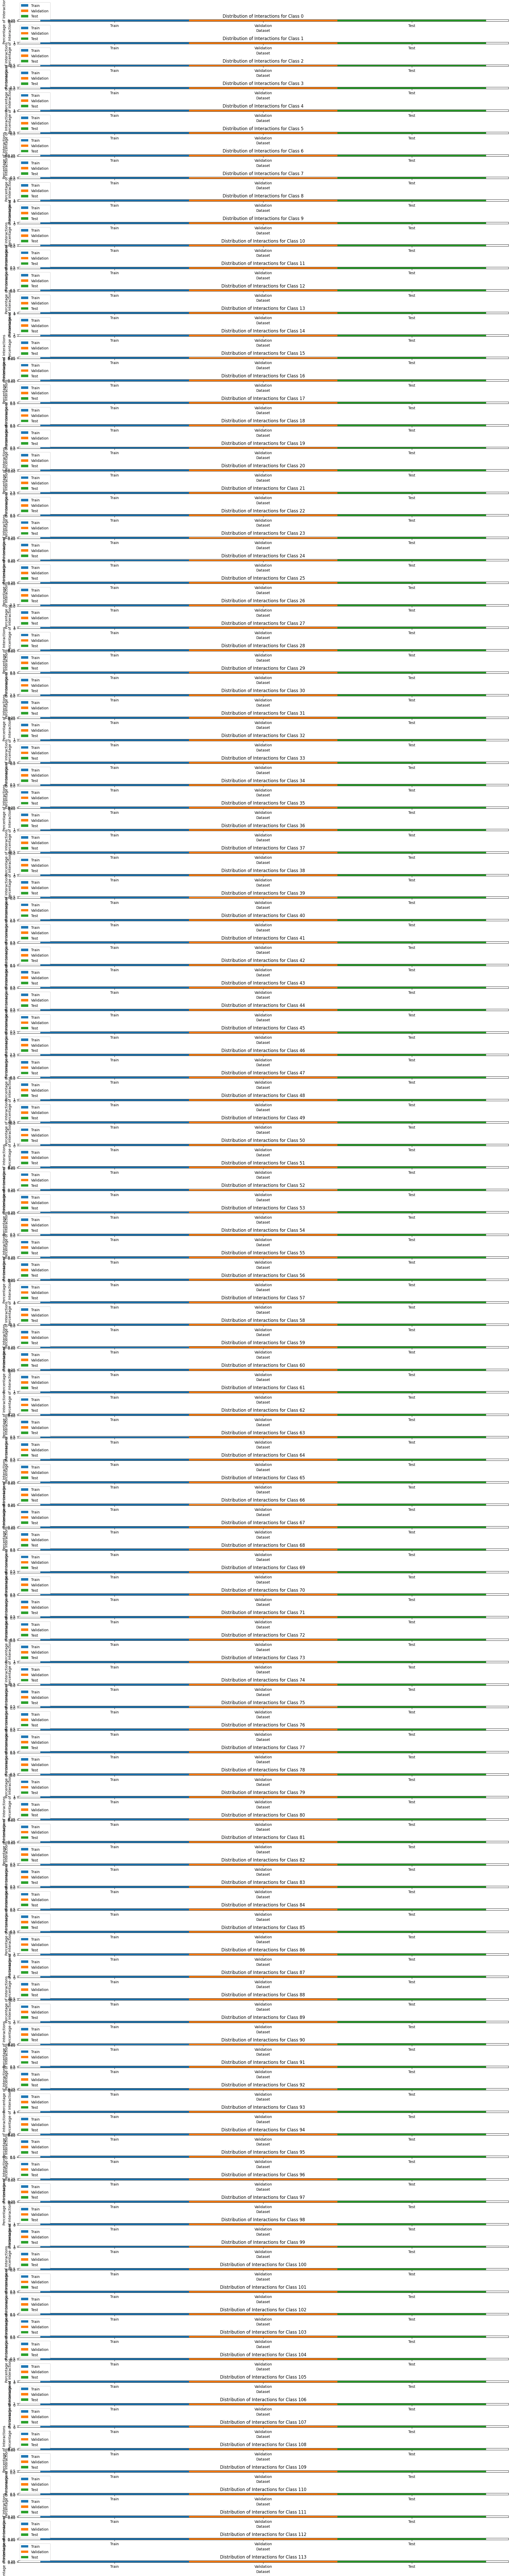

In [ ]:
def calculate_class_percentage(generator, num_files):
    class_counts = generator.classes
    class_percentage = [(class_counts == i).sum() / num_files * 100 for i in range(len(generator.class_indices))]
    return class_percentage

# Calculate class percentages for each dataset
train_class_percentage = calculate_class_percentage(ds_train, train_num_files)
validation_class_percentage = calculate_class_percentage(ds_validation, validation_num_files)
test_class_percentage = calculate_class_percentage(ds_test, test_num_files)

# Create a DataFrame to store class percentages
class_percentages_df = pd.DataFrame({
    'Class Index': range(train_num_classes),
    'Train': train_class_percentage,
    'Validation': validation_class_percentage,
    'Test': test_class_percentage
})

# Set 'Class Index' as index
class_percentages_df.set_index('Class Index', inplace=True)

# Display the DataFrame
print(class_percentages_df)

# Plot one graph per class showing the distribution of interactions across datasets
plt.figure(figsize=(20, 100))

for class_index in range(train_num_classes):
    plt.subplot(train_num_classes, 1, class_index+1)
    plt.bar(0, train_class_percentage[class_index], width=0.2, align='center', label='Train')
    plt.bar(0.2, validation_class_percentage[class_index], width=0.2, align='center', label='Validation')
    plt.bar(0.4, test_class_percentage[class_index], width=0.2, align='center', label='Test')
    plt.xlabel('Dataset')
    plt.ylabel('Percentage of Interactions')
    plt.title(f'Distribution of Interactions for Class {class_index}')
    plt.xticks([0, 0.2, 0.4], ['Train', 'Validation', 'Test'])
    plt.legend()

plt.tight_layout()
plt.show()


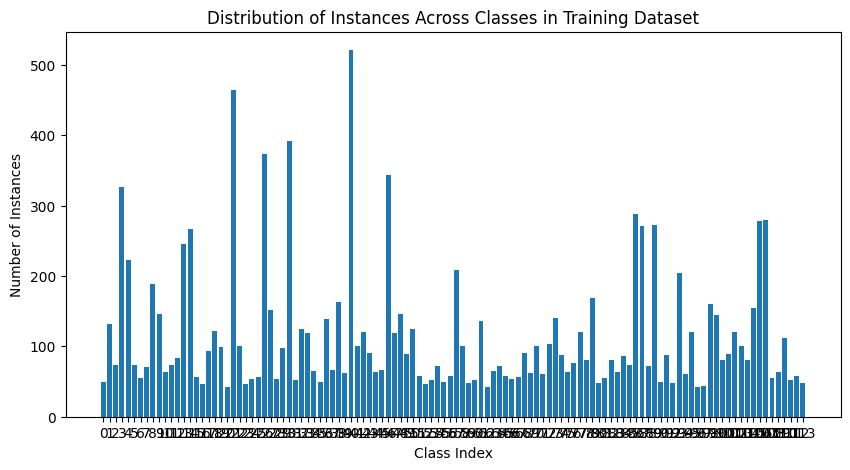

In [ ]:
# The classes are imbalance!

# Get the counts of instances for each class in the training dataset
class_counts_train = ds_train.classes

# Calculate the number of instances for each class
class_instance_counts_train = {class_index: np.sum(class_counts_train == class_index) for class_index in range(train_num_classes)}

# Plot the distribution of instances across classes in the training dataset
plt.figure(figsize=(10, 5))
plt.bar(range(train_num_classes), [class_instance_counts_train[i] for i in range(train_num_classes)], align='center')
plt.xlabel('Class Index')
plt.ylabel('Number of Instances')
plt.title('Distribution of Instances Across Classes in Training Dataset')
plt.xticks(range(train_num_classes), range(train_num_classes))
plt.show()


Error processing image 'e0fedce02782d3e39feb80fd57380226.jpg': cannot identify image file '/content/drive/My Drive/Deep Learning/images/e0fedce02782d3e39feb80fd57380226.jpg'


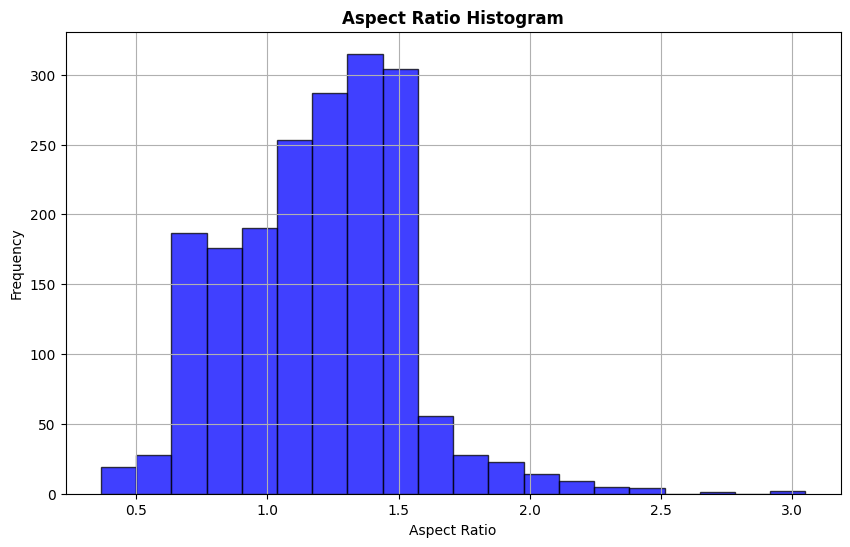

In [ ]:
# The majority of the images are retangules.

# Define the path to the folder containing your images
source_dir = os.path.join(current_dir, "images")

# Compute aspect ratios for each image
aspect_ratios = []
for file in os.listdir(source_dir):
    if file.endswith('.jpg') or file.endswith('.png'):
        image_path = os.path.join(source_dir, file)
        try:
            image = Image.open(image_path)
            w, h = image.size
            aspect_ratio = w / h
            aspect_ratios.append(aspect_ratio)
        except Exception as e:
            print(f"Error processing image '{file}': {e}")

# Plot histogram for aspect ratios
plt.figure(figsize=(10, 6))
n_bins = 20
plt.hist(aspect_ratios, bins=n_bins, histtype='bar', alpha=0.75, density=False, edgecolor='black', color='blue')
plt.title('Aspect Ratio Histogram', fontweight="bold")
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


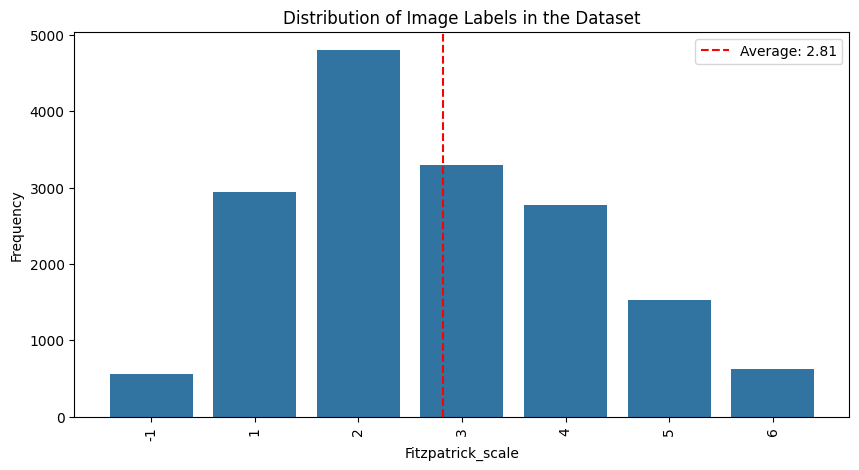

In [ ]:
label_counts = data_fixed["fitzpatrick_scale"].value_counts()


soma=0
soma2=0
for i in label_counts.index:
  if i!=-1:
    soma = soma + i * (label_counts[i])
    soma2 = soma2 + label_counts[i]
average = soma/soma2

plt.figure(figsize=(10, 5))  # You can adjust the size to fit your needs
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel('Fitzpatrick_scale')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels if they're lengthy
plt.plot(average)
plt.axvline(x=average, color='r', linestyle='--',  label=f'Average: {round(average, 2)}')
plt.legend()
plt.title('Distribution of Image Labels in the Dataset')
plt.show()

# Pre-Process

Data Augmentation

In [ ]:
# Augmented images train

datagen = ImageDataGenerator(
    rotation_range=20,      # Rotate images by random degrees
    width_shift_range=0.2,  # Shift images horizontally by a fraction of the width
    height_shift_range=0.2, # Shift images vertically by a fraction of the height
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Randomly zoom images
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    fill_mode='nearest'     # Fill in newly created pixels
)

augmented_images = []
# Iterate over all subdirectories (classes) in the training data directory
for filename in os.listdir(train_dir):
    image_path = os.path.join(train_dir, filename)
    # Check if the current item is a file (not a directory)
    if os.path.isfile(image_path):
        # Load and preprocess the image
        img = load_img(image_path, target_size=(224, 224))
        x = img_to_array(img)
        x = np.expand_dims(x, axis=0)  # Expand dimensions to match batch size

            # Generate augmented images
        aug_iter = datagen.flow(x, batch_size=1)
        for _ in range(5):  # Generate 5 augmented images per original image
            augmented_image = next(aug_iter)[0].astype(np.uint8)
            augmented_images.append(augmented_image)
#augmented_images = np.array(augmented_images)



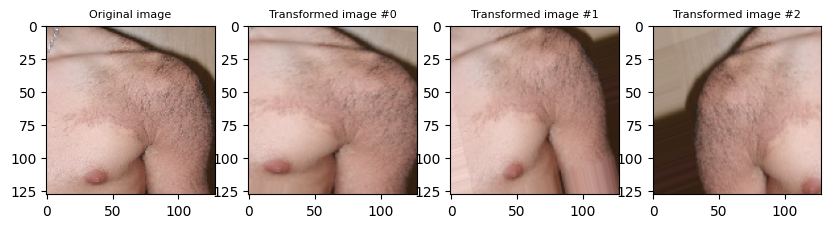

In [ ]:

def show_augmented_sample(image, augmentation_pipe, trials=3, fig_size=(10, 6)):
    # Plot the original image
    plt.figure(figsize=fig_size)
    plt.subplot(1, trials + 1, 1)
    plt.imshow(image)
    plt.title("Original image", size=8)

    # Apply augmentation trials
    for t in range(trials):
        # Pass through the augmentation pipeline
        augmented_image = augmentation_pipe.random_transform(image)
        plt.subplot(1, trials + 1, t + 2)
        plt.imshow(augmented_image)
        plt.title("Transformed image #{}".format(t), size=8)

    plt.show()

# Showing a sample image with its augmented versions
sample_image, _ = next(ds_train)
show_augmented_sample(sample_image[0], augmentation_pipe=datagen, trials=3)

Found 13164 images belonging to 114 classes.
Found 13164 images belonging to 114 classes.


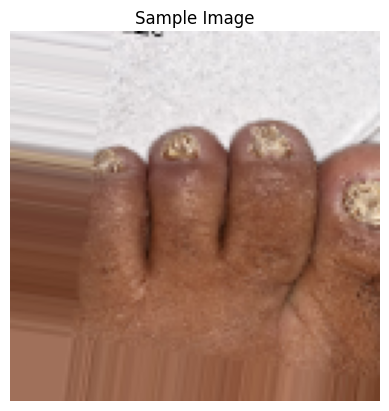

(<keras.src.preprocessing.image.DirectoryIterator at 0x7ccf577869b0>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x7ccfde639750>)

In [ ]:
#Train Augmented Generator


datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,      # Rotate images by random degrees
    width_shift_range=0.2,  # Shift images horizontally by a fraction of the width
    height_shift_range=0.2, # Shift images vertically by a fraction of the height
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Randomly zoom images
    horizontal_flip=True,   # Flip images horizontally
    vertical_flip=True,     # Flip images vertically
    fill_mode='nearest'     # Fill in newly created pixels
)

dataget_not_aug = ImageDataGenerator(rescale=1./255,)





train_augmented = datagen_aug.flow_from_directory(
        train_dir,
        target_size=(128,128),
        batch_size=64,
        classes=os.listdir(train_dir),
        class_mode='categorical')


train_not_augmented = dataget_not_aug.flow_from_directory(
        train_dir,
        target_size=(128,128),
        batch_size=64,
        classes=os.listdir(train_dir),
        class_mode='categorical')

# Fetch a batch of images and their labels
images, labels = next(train_augmented)

# Select the first image in the batch
# Note: The images are normalized (e.g., rescaled if you've set rescale in ImageDataGenerator)
# and in the format (batch_size, height, width, channels)
image = images[0]
image = np.clip(image, 0, 1)

# Display the image
plt.imshow(image)
plt.title("Sample Image")
plt.axis('off') # Hide the axis
plt.show()





train_augmented, ds_validation, ds_test

In [ ]:
from sklearn.utils import class_weight
import numpy as np




classes = train_augmented.class_indices
class_labels = train_augmented.classes
# Calculate class weights
class_weights = class_weight.compute_class_weight(
                   'balanced',
                   classes=np.unique(class_labels),
                   y=class_labels)

class_weights_dict = dict(enumerate(class_weights))

# Class weights : since we have imbalanced classes,  class weights tell the training algorithm to "pay more attention" to samples from underrepresented classes. This helps to prevent the model from becoming biased towards the majority class and improves performance on imbalanced datasets.

# Model Handcrafting


### Model 1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, GlobalMaxPooling2D
from tensorflow.keras import metrics, regularizers

# Initialize the model
model_1 = Sequential()


model_1.add(Conv2D(32, (3, 3), strides=1, padding='same', input_shape=(128, 128, 3), activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_1.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_1.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model_1.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# Flattening the tensors
model_1.add(Flatten())

# Fully-Connected Layers
model_1.add(Dense(2048, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_1.add(Dropout(0.2))

# Output Layer
model_1.add(Dense(114, activation='softmax'))  # Classification layer

# Compile the model
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=[
        metrics.AUC(name='AUROC'),
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')
    ]
)


history1 = model_1.fit(
    train_augmented,
    epochs=20,
    validation_data=ds_validation,
    verbose=1,
    class_weight=class_weights_dict
)

# Summary of the model
model_1.summary()



Epoch 1/20
206/206 [==============================] - 129s 584ms/step - loss: 8.2386 - AUROC: 0.6068 - accuracy: 0.0242 - precision: 0.0144 - recall: 1.5193e-04 - val_loss: 9.1652 - val_AUROC: 0.5102 - val_accuracy: 0.0075 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 111s 540ms/step - loss: 7.6479 - AUROC: 0.6685 - accuracy: 0.0441 - precision: 0.4237 - recall: 0.0019 - val_loss: 8.0968 - val_AUROC: 0.5846 - val_accuracy: 0.0169 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
206/206 [==============================] - 116s 563ms/step - loss: 7.3886 - AUROC: 0.7019 - accuracy: 0.0548 - precision: 0.3833 - recall: 0.0035 - val_loss: 7.3566 - val_AUROC: 0.7165 - val_accuracy: 0.0646 - val_precision: 0.3056 - val_recall: 0.0069
Epoch 4/20
206/206 [==============================] - 111s 539ms/step - loss: 7.1302 - AUROC: 0.7258 - accuracy: 0.0687 - precision: 0.3873 - recall: 0.0051 - val_loss: 7.1104 - val_AUROC:

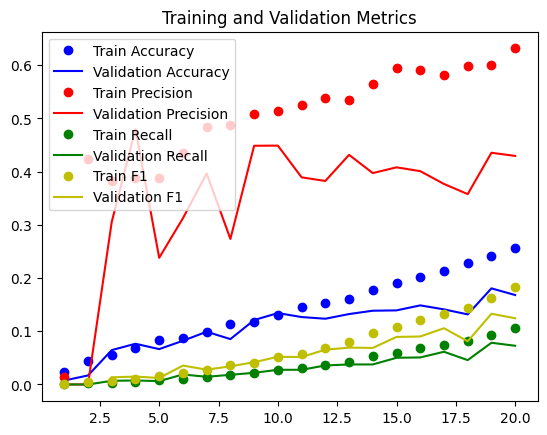

<Figure size 640x480 with 0 Axes>

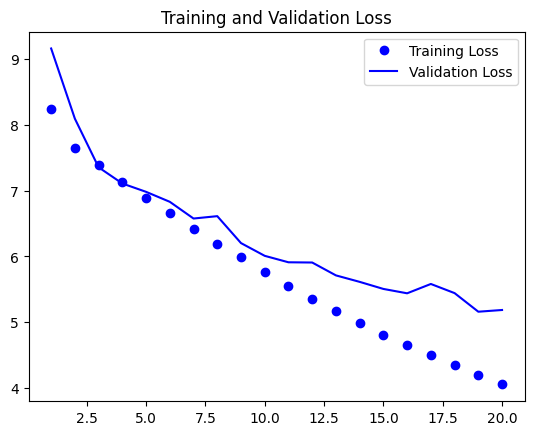

In [ ]:
import matplotlib.pyplot as plt
df_hist_model1 = pd.DataFrame.from_dict(history1.history)

df_hist_model1['f1'] = 2*(df_hist_model1['precision']*df_hist_model1['recall'])/(df_hist_model1['precision'] + df_hist_model1['recall'])
df_hist_model1['val_f1'] = 2*(df_hist_model1['val_precision']*df_hist_model1['val_recall'])/(df_hist_model1['val_precision']+df_hist_model1['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_model1) + 1)

plt.plot(epochs, df_hist_model1['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist_model1['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist_model1['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist_model1['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist_model1['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist_model1['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist_model1['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist_model1['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist_model1['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist_model1['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_1.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )


89/89 [==============================] - 13s 145ms/step - loss: 5.1673 - AUROC: 0.8066 - accuracy: 0.1690 - precision: 0.4276 - recall: 0.0737
Test F1 Score 0.12578616742760912


### Model 2

This model is a typical CNN architecture, defining a NN model using the Keras Sequential API. First with data augmented., and without dropout and kernel regularizer


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import metrics

# Initialize the model
model_2 = Sequential()

# Feature Learning Layers
model_2.add(Conv2D(32, (3,3), strides=1, padding='same', input_shape=(128,128,3)))  # Convolutional layer
model_2.add(Activation('relu'))  # Activation function
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2), padding='same'))


model_2.add(Conv2D(64, (5,5), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2), padding='same'))


model_2.add(Conv2D(128, (3,3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2), padding='same'))


model_2.add(Conv2D(256, (5,5), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2), padding='same'))


model_2.add(Conv2D(512, (3,3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2), padding='same'))


# Flattening tensors
model_2.add(Flatten())

# Fully-Connected Layers
model_2.add(Dense(2048))
model_2.add(Activation('relu'))


# Output Layer
model_2.add(Dense(114, activation='softmax'))  # Classification layer

# Compile the model
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=[
        metrics.AUC(name='AUROC'),
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')
    ]
)

# Train the model

history2 = model_2.fit(
    train_augmented,
    epochs=20,
    validation_data=ds_validation,
    verbose=1,
    class_weight=class_weights_dict
)


Epoch 1/20
206/206 [==============================] - 186s 869ms/step - loss: 4.8940 - AUROC: 0.6274 - accuracy: 0.0289 - precision: 0.0839 - recall: 9.1158e-04 - val_loss: 5.9716 - val_AUROC: 0.5228 - val_accuracy: 0.0188 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 193s 927ms/step - loss: 4.3855 - AUROC: 0.7014 - accuracy: 0.0526 - precision: 0.2647 - recall: 0.0014 - val_loss: 5.4270 - val_AUROC: 0.5816 - val_accuracy: 0.0213 - val_precision: 0.0667 - val_recall: 0.0019
Epoch 3/20
206/206 [==============================] - 153s 740ms/step - loss: 4.2360 - AUROC: 0.7352 - accuracy: 0.0697 - precision: 0.4161 - recall: 0.0047 - val_loss: 4.4245 - val_AUROC: 0.7220 - val_accuracy: 0.0571 - val_precision: 0.3000 - val_recall: 0.0038
Epoch 4/20
206/206 [==============================] - 141s 685ms/step - loss: 4.0907 - AUROC: 0.7542 - accuracy: 0.0871 - precision: 0.4036 - recall: 0.0068 - val_loss: 4.2698 - val_AUROC: 0.7470 

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 activation_18 (Activation)  (None, 128, 128, 32)      0         
                                                                 
 batch_normalization_25 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 64)        51264     
                                                                 
 activation_19 (Activation)  (None, 64, 64, 64)       

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_2.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 12s 133ms/step - loss: 4.5001 - AUROC: 0.7651 - accuracy: 0.1503 - precision: 0.2785 - recall: 0.0817
Test F1 Score 0.12631578907207747


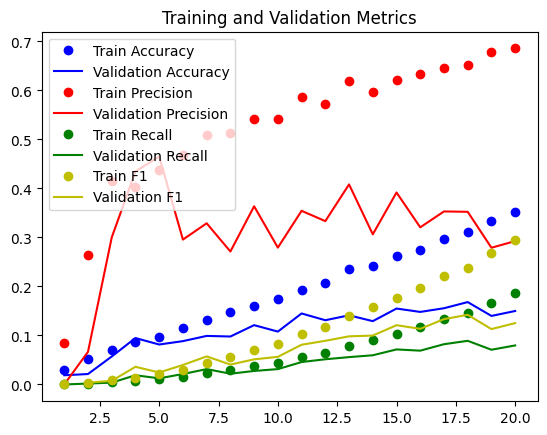

<Figure size 640x480 with 0 Axes>

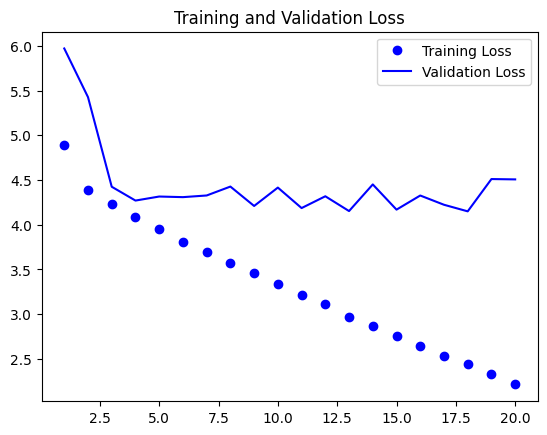

In [ ]:
import matplotlib.pyplot as plt
df_hist_model2 = pd.DataFrame.from_dict(history2.history)

df_hist_model2['f1'] = 2*(df_hist_model2['precision']*df_hist_model2['recall'])/(df_hist_model2['precision'] + df_hist_model2['recall'])
df_hist_model2['val_f1'] = 2*(df_hist_model2['val_precision']*df_hist_model2['val_recall'])/(df_hist_model2['val_precision']+df_hist_model2['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_model2) + 1)

plt.plot(epochs, df_hist_model2['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist_model2['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist_model2['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist_model2['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist_model2['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist_model2['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist_model2['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist_model2['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist_model2['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist_model2['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
# trying without data aug

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import metrics

# Initialize the model
model_2v2 = Sequential()

# Feature Learning Layers
model_2v2 .add(Conv2D(32, (3,3), strides=1, padding='same', input_shape=(128,128,3)))  # Convolutional layer
model_2v2 .add(Activation('relu'))  # Activation function
model_2v2 .add(BatchNormalization())
model_2v2 .add(MaxPooling2D(pool_size=(2,2), padding='same'))


model_2v2 .add(Conv2D(64, (5,5), padding='same'))
model_2v2 .add(Activation('relu'))
model_2v2 .add(BatchNormalization())
model_2v2 .add(MaxPooling2D(pool_size=(2,2), padding='same'))

model_2v2.add(Conv2D(128, (3,3), padding='same'))
model_2v2.add(Activation('relu'))
model_2v2.add(BatchNormalization())
model_2v2.add(MaxPooling2D(pool_size=(2,2), padding='same'))


model_2v2.add(Conv2D(256, (5,5), padding='same'))
model_2v2.add(Activation('relu'))
model_2v2.add(BatchNormalization())
model_2v2.add(MaxPooling2D(pool_size=(2,2), padding='same'))


model_2v2.add(Conv2D(512, (3,3), padding='same'))
model_2v2.add(Activation('relu'))
model_2v2.add(BatchNormalization())
model_2v2.add(MaxPooling2D(pool_size=(2,2), padding='same'))


# Flattening tensors
model_2v2.add(Flatten())

# Fully-Connected Layers
model_2v2.add(Dense(2048))
model_2v2.add(Activation('relu'))


# Output Layer
model_2v2.add(Dense(114, activation='softmax'))  # Classification layer

# Compile the model
model_2v2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=[
        metrics.AUC(name='AUROC'),
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')
    ]
)

# Train the model

history3 = model_2v2.fit(
    train_not_augmented,
    epochs=20,
    validation_data=ds_validation,
    verbose=1,
    class_weight=class_weights_dict)



#### ITS OVERFITTING

Epoch 1/20
206/206 [==============================] - 79s 345ms/step - loss: 4.7264 - AUROC: 0.6674 - accuracy: 0.0554 - precision: 0.2093 - recall: 0.0041 - val_loss: 6.0455 - val_AUROC: 0.5157 - val_accuracy: 0.0050 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 69s 338ms/step - loss: 3.4249 - AUROC: 0.8244 - accuracy: 0.1756 - precision: 0.5760 - recall: 0.0383 - val_loss: 5.7251 - val_AUROC: 0.5569 - val_accuracy: 0.0125 - val_precision: 0.0266 - val_recall: 0.0044
Epoch 3/20
206/206 [==============================] - 67s 324ms/step - loss: 2.3444 - AUROC: 0.9026 - accuracy: 0.3390 - precision: 0.7569 - recall: 0.1481 - val_loss: 4.2583 - val_AUROC: 0.7503 - val_accuracy: 0.1123 - val_precision: 0.3280 - val_recall: 0.0257
Epoch 4/20
206/206 [==============================] - 67s 327ms/step - loss: 1.2146 - AUROC: 0.9627 - accuracy: 0.5755 - precision: 0.8957 - recall: 0.3778 - val_loss: 3.9778 - val_AUROC: 0.7906 - val_ac

KeyboardInterrupt: 

the same as before but with dropout rate to avoid overfitting (train not augmented)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import metrics

# Initialize the model
model_2v3 = Sequential()

# Feature Learning Layers
model_2v3.add(Conv2D(32, (3, 3), strides=1, padding='same', input_shape=(128, 128, 3)))  # Convolutional layer
model_2v3.add(Activation('relu'))  # Activation function
model_2v3.add(BatchNormalization())
model_2v3.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


model_2v3.add(Conv2D(64, (5, 5), padding='same'))
model_2v3.add(Activation('relu'))
model_2v3.add(BatchNormalization())
model_2v3.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


model_2v3.add(Conv2D(128, (3, 3), padding='same'))
model_2v3.add(Activation('relu'))
model_2v3.add(BatchNormalization())
model_2v3.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


model_2v3.add(Conv2D(256, (5, 5), padding='same'))
model_2v3.add(Activation('relu'))
model_2v3.add(BatchNormalization())
model_2v3.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


model_2v3.add(Conv2D(512, (3, 3), padding='same'))
model_2v3.add(Activation('relu'))
model_2v3.add(BatchNormalization())
model_2v3.add(MaxPooling2D(pool_size=(2, 2), padding='same'))


# Flattening tensors
model_2v3.add(Flatten())

# Fully-Connected Layers
model_2v3.add(Dense(2048))
model_2v3.add(Activation('relu'))
model_2v3.add(Dropout(0.2))

# Output Layer
model_2v3.add(Dense(114, activation='softmax'))  # Classification layer

model_2v3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=[
        metrics.AUC(name='AUROC'),
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')])

history4 = model_2v3.fit(
    train_not_augmented,
    epochs=20,
    validation_data=ds_validation,
    verbose=1,
    class_weight=class_weights_dict)


Epoch 1/20
206/206 [==============================] - 75s 328ms/step - loss: 4.7249 - AUROC: 0.6432 - accuracy: 0.0429 - precision: 0.1652 - recall: 0.0014 - val_loss: 5.3712 - val_AUROC: 0.5012 - val_accuracy: 0.0056 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 68s 330ms/step - loss: 4.0074 - AUROC: 0.7567 - accuracy: 0.0973 - precision: 0.5259 - recall: 0.0100 - val_loss: 5.0770 - val_AUROC: 0.5647 - val_accuracy: 0.0125 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
206/206 [==============================] - 65s 317ms/step - loss: 3.4963 - AUROC: 0.8169 - accuracy: 0.1595 - precision: 0.6234 - recall: 0.0299 - val_loss: 4.3269 - val_AUROC: 0.7297 - val_accuracy: 0.0790 - val_precision: 0.5769 - val_recall: 0.0094
Epoch 4/20
206/206 [==============================] - 65s 317ms/step - loss: 2.9394 - AUROC: 0.8629 - accuracy: 0.2428 - precision: 0.7167 - recall: 0.0682 - val_loss: 4.1054 - val_AUROC: 0.7657 

In [ ]:
# using residual blocks

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, BatchNormalization, Add, MaxPooling2D, Flatten, Dense
from tensorflow.keras import metrics

# Input layer
inputs = Input(shape=(128, 128, 3))

# First block with residual connection
x = Conv2D(32, (3, 3), strides=1, padding='same')(inputs)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x1 = Conv2D(32, (3, 3), padding='same')(x)
x1 = Activation('relu')(x1)
x1 = BatchNormalization()(x1)
# Adding the input to the output
residual_1 = Add()([x, x1])

# Second block with residual connection and larger filters
x = Conv2D(64, (5, 5), padding='same')(residual_1)
x = Activation('relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x1 = Conv2D(64, (5, 5), padding='same')(x)
x1 = Activation('relu')(x1)
x1 = BatchNormalization()(x1)
residual_2 = Add()([x, x1])

# Additional blocks can be added here if needed, using similar patterns with possibly different filter sizes

# Flattening the tensor for the fully connected layer
x = Flatten()(residual_2)

# Fully connected layer
x = Dense(2048, activation='relu')(x)

# Output layer
outputs = Dense(114, activation='softmax')(x)

# Create model
model_v2 = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_v2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=[
        metrics.AUC(name='AUROC'),
        metrics.CategoricalAccuracy(name='accuracy'),
        metrics.Precision(name='precision'),
        metrics.Recall(name='recall')
    ]
)


history_v2 = model_v2.fit(
    train_augmented,
    epochs=20,
    validation_data=ds_validation,
    verbose=1,
    class_weight=class_weights_dict)


Epoch 1/20
206/206 [==============================] - 122s 561ms/step - loss: 5.3911 - AUROC: 0.5728 - accuracy: 0.0221 - precision: 0.0320 - recall: 0.0013 - val_loss: 29.3354 - val_AUROC: 0.5139 - val_accuracy: 0.0364 - val_precision: 0.0364 - val_recall: 0.0364
Epoch 2/20
206/206 [==============================] - 115s 560ms/step - loss: 4.6028 - AUROC: 0.6197 - accuracy: 0.0364 - precision: 0.2051 - recall: 6.0772e-04 - val_loss: 5.9709 - val_AUROC: 0.5876 - val_accuracy: 0.0213 - val_precision: 0.0270 - val_recall: 0.0050
Epoch 3/20
206/206 [==============================] - 110s 535ms/step - loss: 4.4820 - AUROC: 0.6622 - accuracy: 0.0434 - precision: 0.2477 - recall: 0.0021 - val_loss: 4.5922 - val_AUROC: 0.6733 - val_accuracy: 0.0395 - val_precision: 0.2647 - val_recall: 0.0056
Epoch 4/20
206/206 [==============================] - 114s 554ms/step - loss: 4.4025 - AUROC: 0.6847 - accuracy: 0.0571 - precision: 0.3136 - recall: 0.0028 - val_loss: 4.5817 - val_AUROC: 0.6769 - val_a

### Model 3 (VGG)

### Model 4 (RESNET)

### Model 5 (Pure handcraft)

# TRANSFER LEARNING


## RESNET V50 (Nao Correr)


In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Accuracy, Precision, Recall
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Activation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from sklearn.metrics import f1_score

base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Start adding layers from base_model's output
x = base_model.output

base_model.trainable = False #Freezing the layers

# Applying GlobalAveragePooling2D to reduce feature dimensions
x = GlobalAveragePooling2D()(x)

# Batch Normalization before activation
x = BatchNormalization()(x)
# Dense layer
x = Dense(1024)(x)

# Batch Normalization before activation
x = BatchNormalization()(x)

x = Activation('relu')(x)

output = Dense(114, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum= 0.9),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history = model.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

# Evaluating the model on the test set
#test_loss, test_acc = model.evaluate(ds_test)
#print(f"Test accuracy: {test_acc}, Test loss: {test_loss")





94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/20
206/206 [==============================] - 122s 565ms/step - loss: 4.9273 - AUROC: 0.5989 - accuracy: 0.0171 - precision: 0.0448 - recall: 6.8368e-04 - val_loss: 4.7475 - val_AUROC: 0.5584 - val_accuracy: 0.0044 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 114s 556ms/step - loss: 4.6948 - AUROC: 0.6504 - accuracy: 0.0272 - precision: 0.1371 - recall: 0.0013 - val_loss: 4.5544 - val_AUROC: 0.6484 - val_accuracy: 0.0295 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
206/206 [==============================] - 114s 553ms/step - loss: 4.6078 - AUROC: 0.6680 - accuracy: 0.0275 - precision: 0.0700 - recall: 5.3175e-04 - val_loss: 4.5037 - val_AUROC: 0.6853 - val_accuracy: 0.0489 - val_precision: 0.0833 - val_recall: 6.2735e-04
Epoch 4/20
206/206 [==============================] - 114s 555ms/step - loss: 4.5295 - AUROC: 0.6800 - accuracy: 0.

Nao correr

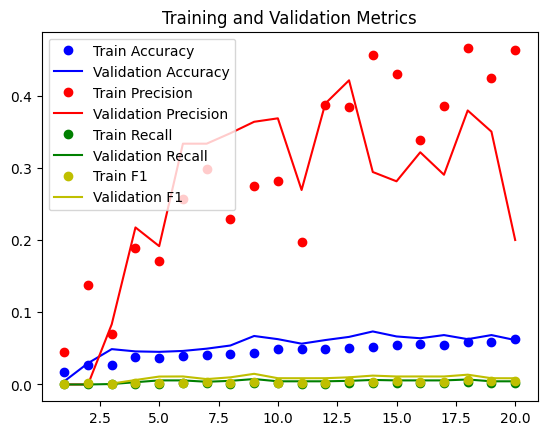

<Figure size 640x480 with 0 Axes>

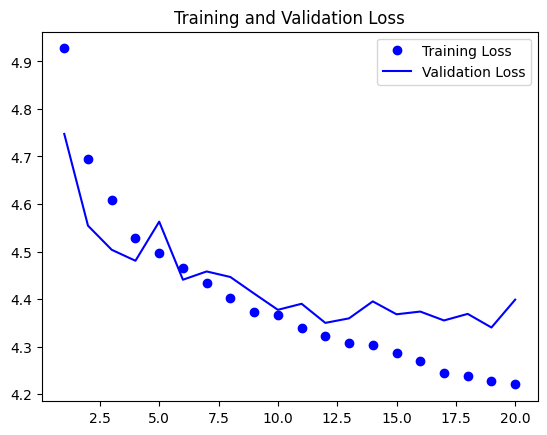

In [ ]:

import matplotlib.pyplot as plt
df_hist = pd.DataFrame.from_dict(history.history)

df_hist['f1'] = 2*(df_hist['precision']*df_hist['recall'])/(df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2*(df_hist['val_precision']*df_hist['val_recall'])/(df_hist['val_precision']+df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

plt.plot(epochs, df_hist['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

Fine Tunning

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Accuracy, Precision, Recall
import tensorflow as tf




base_model.trainable=True


model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_fine_tune_resnet = model.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

# Evaluating the model on the test set
#test_loss, test_acc = model.evaluate(ds_test)
#print(f"Test accuracy: {test_acc}, Test loss: {test_loss")


Epoch 1/10
206/206 [==============================] - 147s 620ms/step - loss: 4.9922 - AUROC: 0.5875 - accuracy: 0.0144 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 6.9703 - val_AUROC: 0.5040 - val_accuracy: 0.0044 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
206/206 [==============================] - 129s 626ms/step - loss: 4.6655 - AUROC: 0.6507 - accuracy: 0.0260 - precision: 0.3158 - recall: 4.5579e-04 - val_loss: 7.2403 - val_AUROC: 0.5158 - val_accuracy: 0.0038 - val_precision: 0.0052 - val_recall: 0.0019
Epoch 3/10
206/206 [==============================] - 131s 635ms/step - loss: 4.4543 - AUROC: 0.6899 - accuracy: 0.0404 - precision: 0.3654 - recall: 0.0014 - val_loss: 6.4420 - val_AUROC: 0.5429 - val_accuracy: 0.0063 - val_precision: 0.0044 - val_recall: 6.2735e-04
Epoch 4/10
206/206 [==============================] - 129s 625ms/step - loss: 4.2954 - AUROC: 0.7179 - accuracy: 0.0552 - precision: 0.4632 - recall: 0.0033 - val_loss: 4.7530 - val_AU

In [ ]:
import matplotlib.pyplot as plt
df_hist = pd.DataFrame.from_dict(history_fine_tune_resnet.history)

df_hist['f1'] = 2*(df_hist['precision']*df_hist['recall'])/(df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2*(df_hist['val_precision']*df_hist['val_recall'])/(df_hist['val_precision']+df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

plt.plot(epochs, df_hist['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)



# Print out all the relevant metrics
print("Test Loss:", test_loss)
print("Test AUC:", test_auc)
print("Test Accuracy:", test_acc)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1)


## Resnet50 v2


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics

# Load ResNet50V2 as the base model, without the top layers
base_model_resnetv2 = ResNet50V2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Set the entire base model's layers to non-trainable
base_model_resnetv2.trainable = False

# Start adding layers from base_model's output
x = base_model_resnetv2.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1024)(x)  # Adding Dense layer here before Activation
x = BatchNormalization()(x)
x = Activation('relu')(x)
output = Dense(114, activation='softmax')(x)  # Final output layer with softmax for classification

# Construct the complete model
model_resnetv2 = Model(inputs=base_model_resnetv2.input, outputs=output)

# Compile the model
model_resnetv2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])

# Assuming train_augmented, ds_validation, and class_weights_dict are defined correctly
history_resnetv2 = model_resnetv2.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict)

# Evaluate the model on the test set
# test_loss, test_acc = model.evaluate(ds_test)
# print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")






94668760/94668760 [==============================] - 0s 0us/step
Epoch 1/20
206/206 [==============================] - 128s 558ms/step - loss: 4.3658 - AUROC: 0.7157 - accuracy: 0.0698 - precision: 0.3203 - recall: 0.0087 - val_loss: 3.9512 - val_AUROC: 0.7997 - val_accuracy: 0.1267 - val_precision: 0.4659 - val_recall: 0.0257
Epoch 2/20
206/206 [==============================] - 111s 541ms/step - loss: 3.6073 - AUROC: 0.8208 - accuracy: 0.1461 - precision: 0.4822 - recall: 0.0309 - val_loss: 3.7447 - val_AUROC: 0.8252 - val_accuracy: 0.1556 - val_precision: 0.5221 - val_recall: 0.0445
Epoch 3/20
206/206 [==============================] - 109s 530ms/step - loss: 3.3151 - AUROC: 0.8478 - accuracy: 0.1828 - precision: 0.5330 - recall: 0.0497 - val_loss: 3.7673 - val_AUROC: 0.8148 - val_accuracy: 0.1719 - val_precision: 0.4279 - val_recall: 0.0577
Epoch 4/20
206/206 [==============================] - 108s 525ms/step - loss: 3.0966 - AUROC: 0.8654 - accuracy: 0.2111 - precision: 0.5869 - r

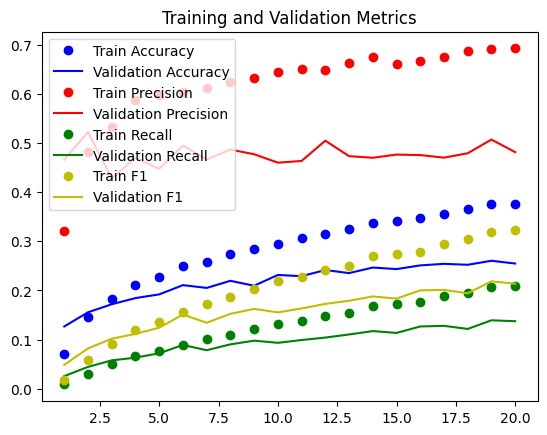

<Figure size 640x480 with 0 Axes>

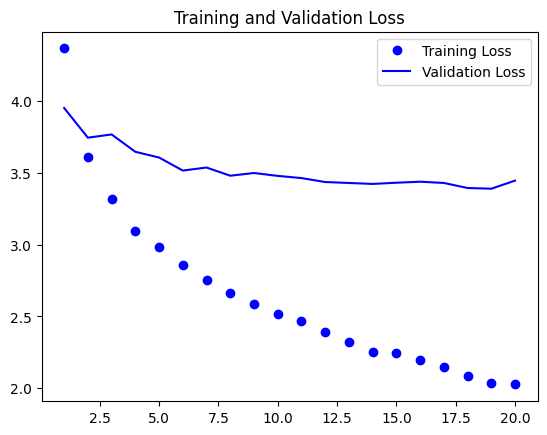

In [ ]:
import matplotlib.pyplot as plt
df_hist_resnet_v2 = pd.DataFrame.from_dict(history_resnetv2.history)

df_hist_resnet_v2['f1'] = 2 * (df_hist_resnet_v2['precision'] * df_hist_resnet_v2['recall']) / (df_hist_resnet_v2['precision'] + df_hist_resnet_v2['recall'])
df_hist_resnet_v2['val_f1'] = 2*(df_hist_resnet_v2['val_precision']*df_hist_resnet_v2['val_recall'])/(df_hist_resnet_v2['val_precision']+df_hist_resnet_v2['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_resnet_v2) + 1)

plt.plot(epochs, df_hist_resnet_v2['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist_resnet_v2['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist_resnet_v2['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist_resnet_v2['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist_resnet_v2['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist_resnet_v2['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist_resnet_v2['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist_resnet_v2['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist_resnet_v2['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist_resnet_v2['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_resnetv2.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )


89/89 [==============================] - 11s 120ms/step - loss: 3.5573 - AUROC: 0.8403 - accuracy: 0.2450 - precision: 0.4554 - recall: 0.1361
Test F1 Score 0.20960699441308903


In [ ]:
base_model_resnetv2.trainable=True


model_resnetv2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_fine_tune_resnetv2 = model_resnetv2.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

Epoch 1/20
206/206 [==============================] - 138s 569ms/step - loss: 2.7352 - AUROC: 0.8887 - accuracy: 0.2593 - precision: 0.5201 - recall: 0.1256 - val_loss: 3.9273 - val_AUROC: 0.8103 - val_accuracy: 0.1939 - val_precision: 0.3448 - val_recall: 0.1066
Epoch 2/20
206/206 [==============================] - 117s 569ms/step - loss: 2.3228 - AUROC: 0.9122 - accuracy: 0.3209 - precision: 0.6062 - recall: 0.1721 - val_loss: 3.6545 - val_AUROC: 0.8346 - val_accuracy: 0.2296 - val_precision: 0.4004 - val_recall: 0.1349
Epoch 3/20
206/206 [==============================] - 119s 575ms/step - loss: 2.0838 - AUROC: 0.9255 - accuracy: 0.3566 - precision: 0.6553 - recall: 0.2026 - val_loss: 3.6142 - val_AUROC: 0.8354 - val_accuracy: 0.2459 - val_precision: 0.4234 - val_recall: 0.1474
Epoch 4/20
206/206 [==============================] - 119s 576ms/step - loss: 1.9496 - AUROC: 0.9308 - accuracy: 0.3829 - precision: 0.6801 - recall: 0.2219 - val_loss: 3.5433 - val_AUROC: 0.8414 - val_accura

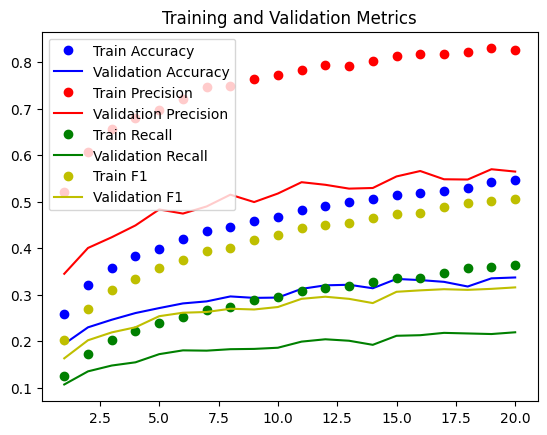

<Figure size 640x480 with 0 Axes>

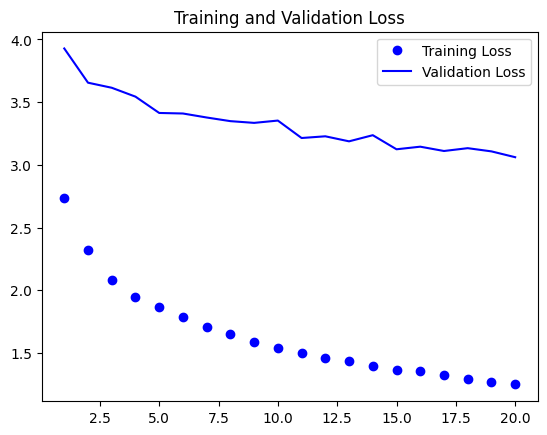

In [ ]:

history_fine_tune_resnetv2 = pd.DataFrame.from_dict(history_fine_tune_resnetv2.history)


history_fine_tune_resnetv2['f1'] = 2*(
history_fine_tune_resnetv2['precision']*
history_fine_tune_resnetv2['recall'])/(
history_fine_tune_resnetv2['precision'] +
history_fine_tune_resnetv2['recall'])

history_fine_tune_resnetv2['val_f1'] = 2*(
history_fine_tune_resnetv2['val_precision']*
history_fine_tune_resnetv2['val_recall'])/(
history_fine_tune_resnetv2['val_precision']+
history_fine_tune_resnetv2['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(
history_fine_tune_resnetv2) + 1)

plt.plot(epochs,
history_fine_tune_resnetv2['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs,
history_fine_tune_resnetv2['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs,
history_fine_tune_resnetv2['precision'], 'ro', label='Train Precision')
plt.plot(epochs,
history_fine_tune_resnetv2['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs,
history_fine_tune_resnetv2['recall'], 'go', label='Train Recall')
plt.plot(epochs,
history_fine_tune_resnetv2['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs,
history_fine_tune_resnetv2['f1'], 'yo', label='Train F1')
plt.plot(epochs,
history_fine_tune_resnetv2['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, history_fine_tune_resnetv2['loss'], 'bo', label='Training Loss')
plt.plot(epochs, history_fine_tune_resnetv2['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_resnetv2.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )






89/89 [==============================] - 8s 93ms/step - loss: 3.2042 - AUROC: 0.8613 - accuracy: 0.3335 - precision: 0.5441 - recall: 0.2206
Test F1 Score 0.3139628670572369


## RESNET 152V2


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics

# Load ResNet50V2 as the base model, without the top layers
base_model_resnet152v2 =ResNet152V2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Set the entire base model's layers to non-trainable
base_model_resnet152v2.trainable = False

# Start adding layers from base_model's output
x = base_model_resnet152v2.output
x = GlobalAveragePooling2D()(x)

x = BatchNormalization()(x)
x = Dense(1024)(x)  # Adding Dense layer here before Activation
x = BatchNormalization()(x)
x = Activation('relu')(x)
output = Dense(114, activation='softmax')(x)  # Final output layer with softmax for classification

# Construct the complete model
model_resnet152v2 = Model(inputs=base_model_resnet152v2.input, outputs=output)

# Compile the model
model_resnet152v2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])

# Assuming train_augmented, ds_validation, and class_weights_dict are defined correctly
history_resnet152v2 = model_resnet152v2.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict)


234545216/234545216 [==============================] - 3s 0us/step
Epoch 1/20
206/206 [==============================] - 137s 609ms/step - loss: 4.3801 - AUROC: 0.7098 - accuracy: 0.0716 - precision: 0.2917 - recall: 0.0074 - val_loss: 3.9969 - val_AUROC: 0.7923 - val_accuracy: 0.1211 - val_precision: 0.4286 - val_recall: 0.0245
Epoch 2/20
206/206 [==============================] - 121s 587ms/step - loss: 3.6445 - AUROC: 0.8168 - accuracy: 0.1445 - precision: 0.4883 - recall: 0.0301 - val_loss: 3.8364 - val_AUROC: 0.8128 - val_accuracy: 0.1418 - val_precision: 0.4184 - val_recall: 0.0370
Epoch 3/20
206/206 [==============================] - 120s 582ms/step - loss: 3.3734 - AUROC: 0.8430 - accuracy: 0.1784 - precision: 0.5250 - recall: 0.0447 - val_loss: 3.7105 - val_AUROC: 0.8266 - val_accuracy: 0.1662 - val_precision: 0.4775 - val_recall: 0.0533
Epoch 4/20
206/206 [==============================] - 122s 591ms/step - loss: 3.1927 - AUROC: 0.8577 - accuracy: 0.2023 - precision: 0.5610 -

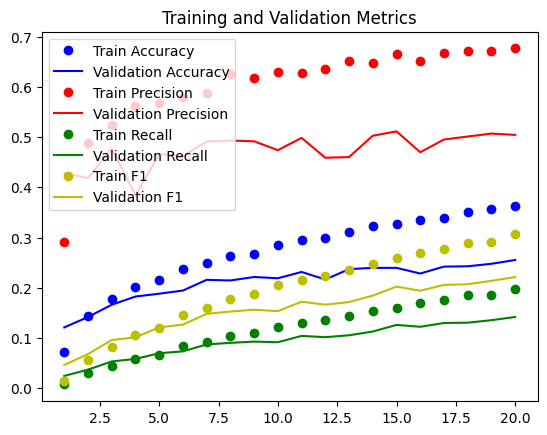

<Figure size 640x480 with 0 Axes>

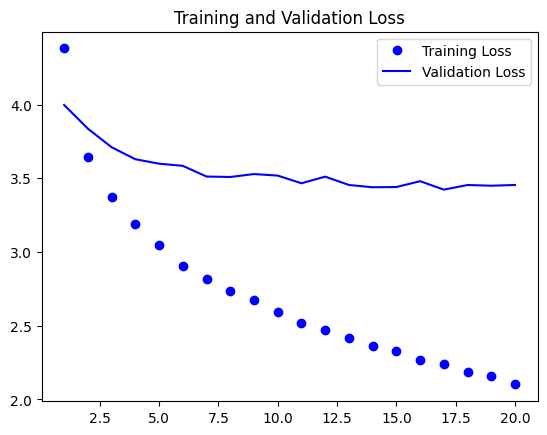

In [ ]:
import matplotlib.pyplot as plt
df_hist_resnet152v2 = pd.DataFrame.from_dict(history_resnet152v2.history)

df_hist_resnet152v2['f1'] = 2 * (df_hist_resnet152v2['precision'] * df_hist_resnet152v2['recall']) / (df_hist_resnet152v2['precision'] + df_hist_resnet152v2['recall'])
df_hist_resnet152v2['val_f1'] = 2*(df_hist_resnet152v2['val_precision']*df_hist_resnet152v2['val_recall'])/(df_hist_resnet152v2['val_precision']+df_hist_resnet152v2['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_resnet152v2) + 1)

plt.plot(epochs, df_hist_resnet152v2['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist_resnet152v2['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist_resnet152v2['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist_resnet152v2['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist_resnet152v2['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist_resnet152v2['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist_resnet152v2['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist_resnet152v2['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist_resnet152v2['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist_resnet152v2['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
base_model_resnet152v2.trainable=True


model_resnet152v2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_fine_tune_resnet152v2= model_resnet152v2.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

Epoch 1/20
206/206 [==============================] - 210s 744ms/step - loss: 2.7970 - AUROC: 0.8855 - accuracy: 0.2594 - precision: 0.5231 - recall: 0.1221 - val_loss: 3.8146 - val_AUROC: 0.8156 - val_accuracy: 0.2265 - val_precision: 0.3845 - val_recall: 0.1274
Epoch 2/20
206/206 [==============================] - 151s 732ms/step - loss: 2.3343 - AUROC: 0.9111 - accuracy: 0.3220 - precision: 0.5998 - recall: 0.1740 - val_loss: 3.5914 - val_AUROC: 0.8400 - val_accuracy: 0.2491 - val_precision: 0.4355 - val_recall: 0.1587
Epoch 3/20
206/206 [==============================] - 153s 740ms/step - loss: 2.1167 - AUROC: 0.9218 - accuracy: 0.3533 - precision: 0.6425 - recall: 0.1999 - val_loss: 3.5078 - val_AUROC: 0.8470 - val_accuracy: 0.2673 - val_precision: 0.4542 - val_recall: 0.1681
Epoch 4/20
206/206 [==============================] - 151s 734ms/step - loss: 1.9564 - AUROC: 0.9303 - accuracy: 0.3820 - precision: 0.6766 - recall: 0.2215 - val_loss: 3.4250 - val_AUROC: 0.8461 - val_accura

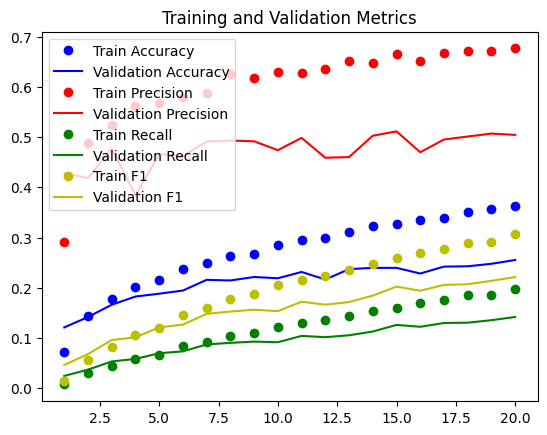

<Figure size 640x480 with 0 Axes>

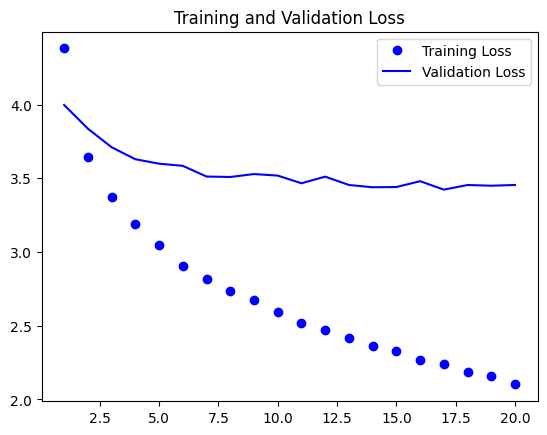

In [ ]:
import matplotlib.pyplot as plt

history_fine_tune_resnet152v2 = pd.DataFrame.from_dict(history_resnet152v2.history)

history_fine_tune_resnet152v2['f1'] = 2 * (
history_fine_tune_resnet152v2['precision'] *
history_fine_tune_resnet152v2['recall']) / (
history_fine_tune_resnet152v2['precision'] +
history_fine_tune_resnet152v2['recall'])

history_fine_tune_resnet152v2['val_f1'] = 2*(
history_fine_tune_resnet152v2['val_precision']*
history_fine_tune_resnet152v2['val_recall'])/(
history_fine_tune_resnet152v2['val_precision']+
history_fine_tune_resnet152v2['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(
history_fine_tune_resnet152v2) + 1)

plt.plot(epochs,
history_fine_tune_resnet152v2['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs,
history_fine_tune_resnet152v2['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs,
history_fine_tune_resnet152v2['precision'], 'ro', label='Train Precision')
plt.plot(epochs,
history_fine_tune_resnet152v2['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs,
history_fine_tune_resnet152v2['recall'], 'go', label='Train Recall')
plt.plot(epochs,
history_fine_tune_resnet152v2['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs,
history_fine_tune_resnet152v2['f1'], 'yo', label='Train F1')
plt.plot(epochs,
history_fine_tune_resnet152v2['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs,
history_fine_tune_resnet152v2['loss'], 'bo', label='Training Loss')
plt.plot(epochs,
history_fine_tune_resnet152v2['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:


test_loss, test_auc, test_acc, test_precision, test_recall = model_resnet152v2.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)


print("Test F1 Score", test_f1)


89/89 [==============================] - 10s 116ms/step - loss: 3.0705 - AUROC: 0.8705 - accuracy: 0.3409 - precision: 0.5577 - recall: 0.2467
Test F1 Score 0.3421156026937167




```
# Isto está formatado como código
```

## DenseNet121

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics


base_model_DenseNet = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Start adding layers from base_model's output
x = base_model_DenseNet.output

base_model_DenseNet.trainable = False

# Applying GlobalAveragePooling2D to reduce feature dimensions
x = GlobalAveragePooling2D()(x)

# Batch Normalization before activation
x = BatchNormalization()(x)
# Dense layer
x = Dense(1024)(x)  # Do not apply activation here yet

# Batch Normalization before activation
x = BatchNormalization()(x)

x = Activation('relu')(x)
output = Dense(114, activation='softmax')(x)

model_DenseNet = Model(inputs=base_model_DenseNet.input, outputs=output)

model_DenseNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_DenseNet = model_DenseNet.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

Epoch 1/20
206/206 [==============================] - 131s 602ms/step - loss: 4.1780 - AUROC: 0.7366 - accuracy: 0.0915 - precision: 0.4110 - recall: 0.0125 - val_loss: 3.7899 - val_AUROC: 0.8129 - val_accuracy: 0.1418 - val_precision: 0.4299 - val_recall: 0.0289
Epoch 2/20
206/206 [==============================] - 137s 666ms/step - loss: 3.3513 - AUROC: 0.8447 - accuracy: 0.1825 - precision: 0.5745 - recall: 0.0492 - val_loss: 3.6455 - val_AUROC: 0.8304 - val_accuracy: 0.1901 - val_precision: 0.4537 - val_recall: 0.0583
Epoch 3/20
206/206 [==============================] - 115s 555ms/step - loss: 3.0354 - AUROC: 0.8725 - accuracy: 0.2283 - precision: 0.6040 - recall: 0.0737 - val_loss: 3.5400 - val_AUROC: 0.8423 - val_accuracy: 0.1989 - val_precision: 0.4880 - val_recall: 0.0765
Epoch 4/20
206/206 [==============================] - 113s 548ms/step - loss: 2.7990 - AUROC: 0.8908 - accuracy: 0.2632 - precision: 0.6289 - recall: 0.0927 - val_loss: 3.4326 - val_AUROC: 0.8552 - val_accura

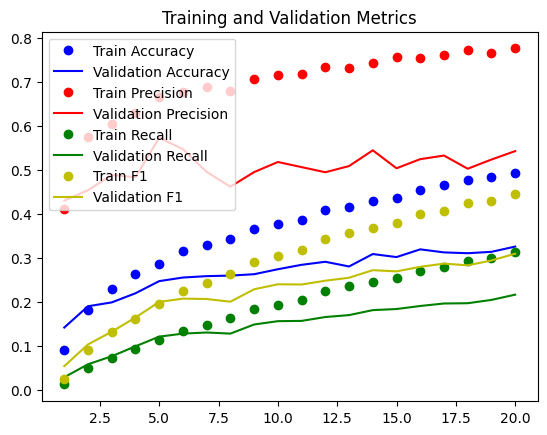

<Figure size 640x480 with 0 Axes>

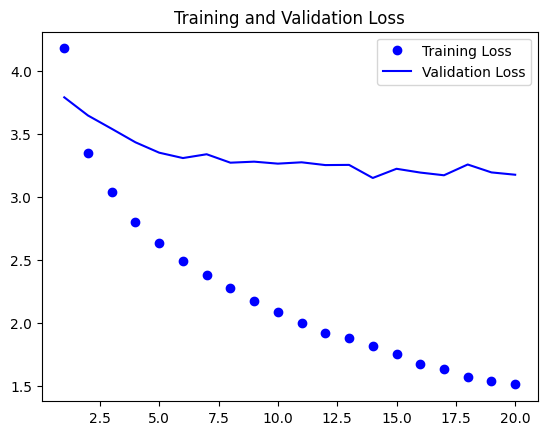

In [ ]:
df_hist_DenseNet = pd.DataFrame.from_dict(history_DenseNet.history)

df_hist_DenseNet['f1'] = 2*(df_hist_DenseNet['precision']*df_hist_DenseNet['recall'])/(df_hist_DenseNet['precision'] + df_hist_DenseNet['recall'])
df_hist_DenseNet['val_f1'] = 2*(df_hist_DenseNet['val_precision']*df_hist_DenseNet['val_recall'])/(df_hist_DenseNet['val_precision']+df_hist_DenseNet['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_DenseNet) + 1)

plt.plot(epochs, df_hist_DenseNet['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist_DenseNet['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist_DenseNet['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist_DenseNet['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist_DenseNet['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist_DenseNet['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist_DenseNet['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist_DenseNet['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist_DenseNet['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist_DenseNet['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_DenseNet.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )


89/89 [==============================] - 11s 124ms/step - loss: 3.1156 - AUROC: 0.8740 - accuracy: 0.3216 - precision: 0.5427 - recall: 0.2127
Test F1 Score 0.3056234710902168


##### Fine tuning

In [ ]:
base_model_DenseNet.trainable=True


model_DenseNet.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_fine_tune_DenseNet = model_DenseNet.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )



Epoch 1/20
206/206 [==============================] - 167s 613ms/step - loss: 2.3790 - AUROC: 0.9161 - accuracy: 0.3358 - precision: 0.6015 - recall: 0.1861 - val_loss: 3.3553 - val_AUROC: 0.8529 - val_accuracy: 0.3018 - val_precision: 0.5107 - val_recall: 0.1951
Epoch 2/20
206/206 [==============================] - 124s 602ms/step - loss: 1.8133 - AUROC: 0.9450 - accuracy: 0.4260 - precision: 0.7017 - recall: 0.2618 - val_loss: 3.2445 - val_AUROC: 0.8590 - val_accuracy: 0.3118 - val_precision: 0.5257 - val_recall: 0.2183
Epoch 3/20
206/206 [==============================] - 127s 618ms/step - loss: 1.5906 - AUROC: 0.9547 - accuracy: 0.4676 - precision: 0.7400 - recall: 0.2990 - val_loss: 3.3357 - val_AUROC: 0.8570 - val_accuracy: 0.3061 - val_precision: 0.4993 - val_recall: 0.2152
Epoch 4/20
206/206 [==============================] - 125s 605ms/step - loss: 1.4707 - AUROC: 0.9591 - accuracy: 0.4933 - precision: 0.7685 - recall: 0.3255 - val_loss: 3.2923 - val_AUROC: 0.8582 - val_accura

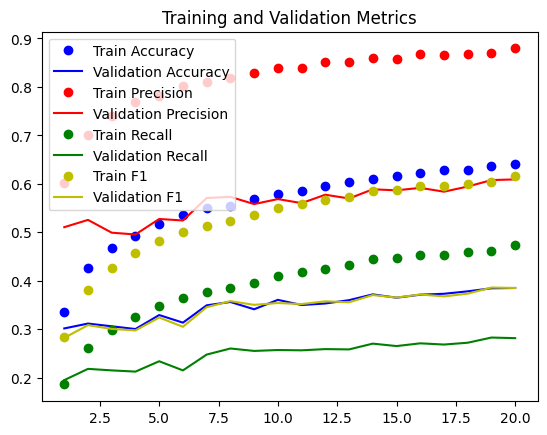

<Figure size 640x480 with 0 Axes>

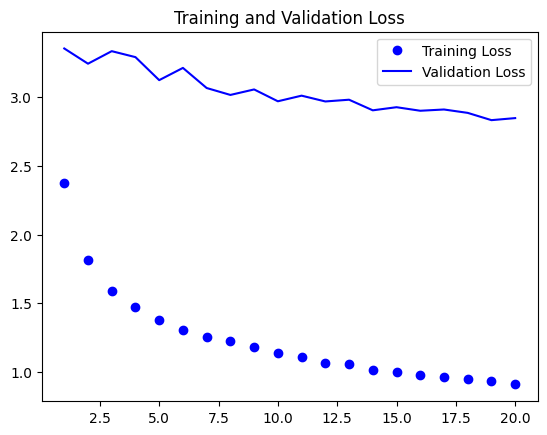

In [ ]:
df_hist = pd.DataFrame.from_dict(history_fine_tune_DenseNet.history)

df_hist['f1'] = 2*(df_hist['precision']*df_hist['recall'])/(df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2*(df_hist['val_precision']*df_hist['val_recall'])/(df_hist['val_precision']+df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

plt.plot(epochs, df_hist['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_DenseNet.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 9s 95ms/step - loss: 2.8459 - AUROC: 0.8865 - accuracy: 0.3931 - precision: 0.6007 - recall: 0.2893
Test F1 Score 0.39050535872338915


In [ ]:
model_DenseNet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 134, 134, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']    

#Dense net 201


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics


base_model_DenseNet201 = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Start adding layers from base_model's output
x = base_model_DenseNet201.output

base_model_DenseNet201.trainable = False

# Applying GlobalAveragePooling2D to reduce feature dimensions
x = GlobalAveragePooling2D()(x)

# Batch Normalization before activation
x = BatchNormalization()(x)
# Dense layer
x = Dense(1024)(x)  # Do not apply activation here yet

# Batch Normalization before activation
x = BatchNormalization()(x)

x = Activation('relu')(x)
output = Dense(114, activation='softmax')(x)

model_DenseNet201 = Model(inputs=base_model_DenseNet201.input, outputs=output)

model_DenseNet201.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_DN = model_DenseNet201.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

Epoch 1/20
206/206 [==============================] - 163s 674ms/step - loss: 4.1650 - AUROC: 0.7400 - accuracy: 0.0922 - precision: 0.4116 - recall: 0.0134 - val_loss: 3.8421 - val_AUROC: 0.8067 - val_accuracy: 0.1493 - val_precision: 0.4958 - val_recall: 0.0370
Epoch 2/20
206/206 [==============================] - 122s 593ms/step - loss: 3.2855 - AUROC: 0.8516 - accuracy: 0.1964 - precision: 0.5849 - recall: 0.0536 - val_loss: 3.5425 - val_AUROC: 0.8437 - val_accuracy: 0.1951 - val_precision: 0.5337 - val_recall: 0.0696
Epoch 3/20
206/206 [==============================] - 122s 591ms/step - loss: 2.9229 - AUROC: 0.8827 - accuracy: 0.2453 - precision: 0.6219 - recall: 0.0841 - val_loss: 3.4362 - val_AUROC: 0.8488 - val_accuracy: 0.2227 - val_precision: 0.5214 - val_recall: 0.0916
Epoch 4/20
206/206 [==============================] - 123s 595ms/step - loss: 2.6690 - AUROC: 0.8995 - accuracy: 0.2835 - precision: 0.6571 - recall: 0.1090 - val_loss: 3.3572 - val_AUROC: 0.8589 - val_accura

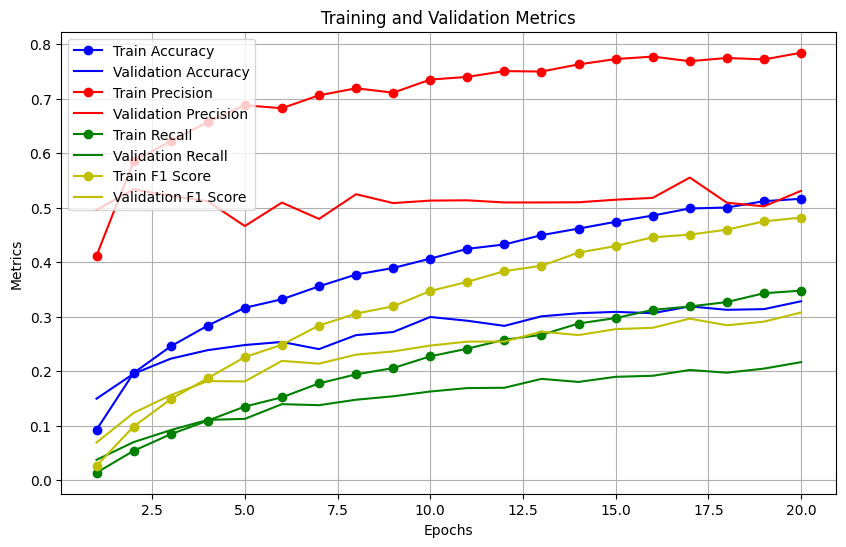

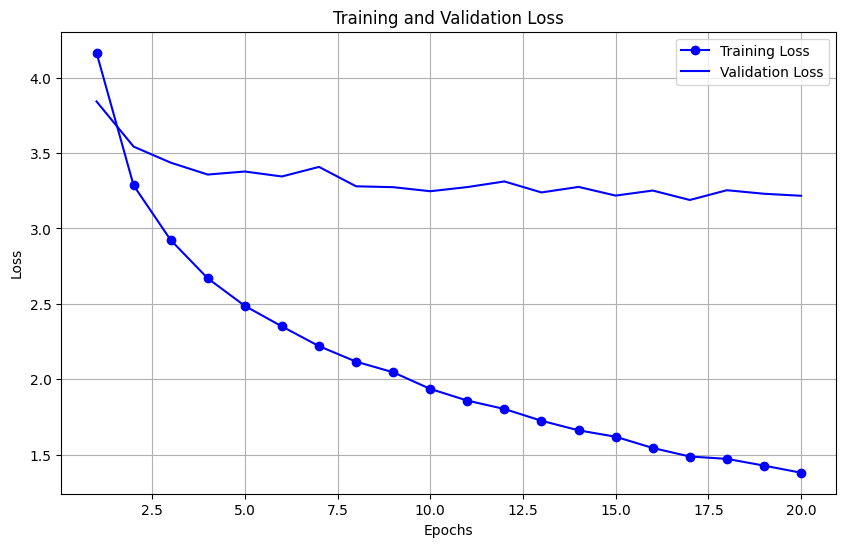

In [ ]:
# Assuming history is an object with a history attribute
df_hist_DN201 = pd.DataFrame.from_dict(history_DN.history)

# Calculate F1 score for training and validation sets
df_hist_DN201['f1'] = 2 * (df_hist_DN201['precision'] * df_hist_DN201['recall']) / (df_hist_DN201['precision'] + df_hist_DN201['recall'])
df_hist_DN201['val_f1'] = 2 * (df_hist_DN201['val_precision'] * df_hist_DN201['val_recall']) / (df_hist_DN201['val_precision'] + df_hist_DN201['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_DN201) + 1)

# Plot Training and Validation Metrics
plt.figure(figsize=(10, 6))
plt.plot(epochs, df_hist_DN201['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(epochs, df_hist_DN201['val_accuracy'], 'b-', label='Validation Accuracy')
plt.plot(epochs, df_hist_DN201['precision'], 'ro-', label='Train Precision')
plt.plot(epochs, df_hist_DN201['val_precision'], 'r-', label='Validation Precision')
plt.plot(epochs, df_hist_DN201['recall'], 'go-', label='Train Recall')
plt.plot(epochs, df_hist_DN201['val_recall'], 'g-', label='Validation Recall')
plt.plot(epochs, df_hist_DN201['f1'], 'yo-', label='Train F1 Score')
plt.plot(epochs, df_hist_DN201['val_f1'], 'y-', label='Validation F1 Score')
plt.title("Training and Validation Metrics")
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, df_hist_DN201['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, df_hist_DN201['val_loss'], 'b-', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
base_model_DenseNet201.trainable=True


model_DenseNet201.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_fine_tune_DenseNet_201 = model_DenseNet201.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )


Epoch 1/20
206/206 [==============================] - 222s 712ms/step - loss: 2.3361 - AUROC: 0.9162 - accuracy: 0.3519 - precision: 0.5990 - recall: 0.2094 - val_loss: 3.5868 - val_AUROC: 0.8349 - val_accuracy: 0.2886 - val_precision: 0.4369 - val_recall: 0.1976
Epoch 2/20
206/206 [==============================] - 139s 670ms/step - loss: 1.6423 - AUROC: 0.9495 - accuracy: 0.4585 - precision: 0.7135 - recall: 0.3048 - val_loss: 3.3113 - val_AUROC: 0.8563 - val_accuracy: 0.3225 - val_precision: 0.5046 - val_recall: 0.2409
Epoch 3/20
206/206 [==============================] - 138s 670ms/step - loss: 1.4098 - AUROC: 0.9580 - accuracy: 0.5057 - precision: 0.7526 - recall: 0.3526 - val_loss: 3.2623 - val_AUROC: 0.8588 - val_accuracy: 0.3124 - val_precision: 0.5007 - val_recall: 0.2346
Epoch 4/20
206/206 [==============================] - 137s 666ms/step - loss: 1.2693 - AUROC: 0.9634 - accuracy: 0.5435 - precision: 0.7915 - recall: 0.3819 - val_loss: 3.1834 - val_AUROC: 0.8664 - val_accura

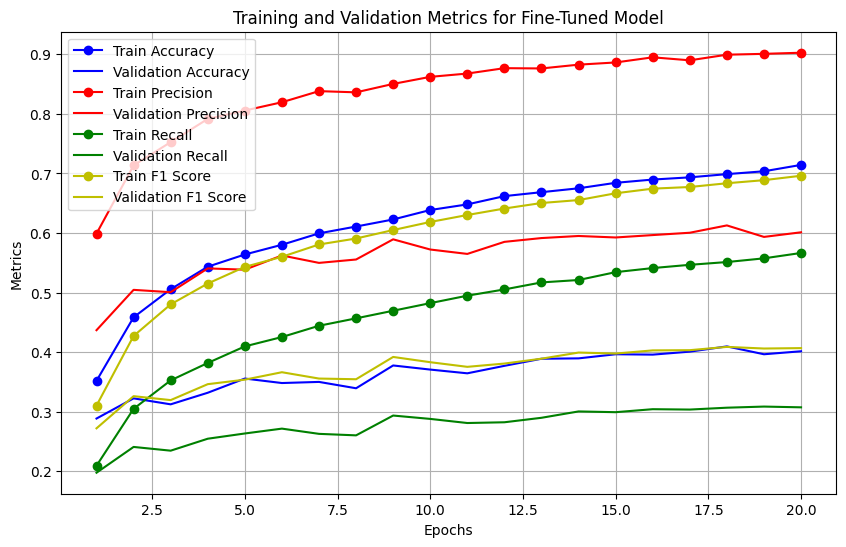

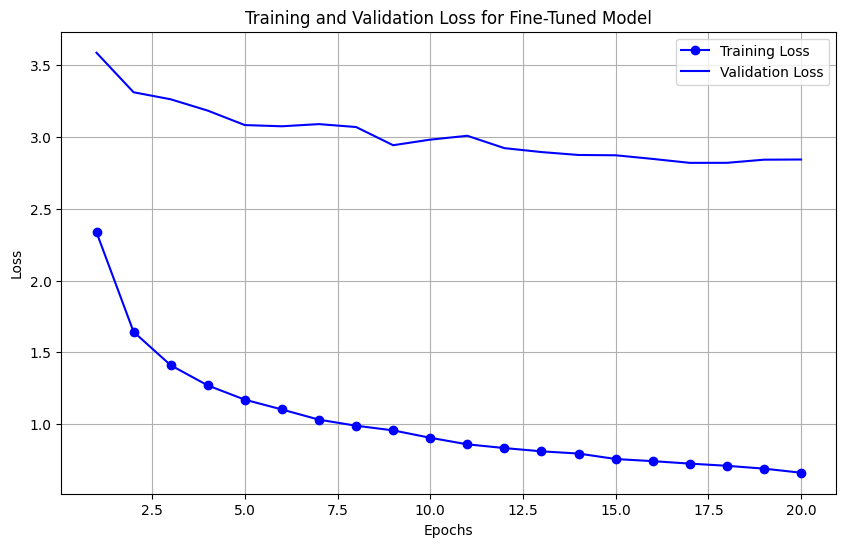

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming history_fine_tune_DenseNet_201_DN.history is previously defined
df_hist_DN201_FINETUNE = pd.DataFrame.from_dict(history_fine_tune_DenseNet_201.history)

# Calculate F1 score for training and validation sets
df_hist_DN201_FINETUNE['f1'] = 2 * (df_hist_DN201_FINETUNE['precision'] * df_hist_DN201_FINETUNE['recall']) / (df_hist_DN201_FINETUNE['precision'] + df_hist_DN201_FINETUNE['recall'])
df_hist_DN201_FINETUNE['val_f1'] = 2 * (df_hist_DN201_FINETUNE['val_precision'] * df_hist_DN201_FINETUNE['val_recall']) / (df_hist_DN201_FINETUNE['val_precision'] + df_hist_DN201_FINETUNE['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_DN201_FINETUNE) + 1)

# Plot Training and Validation Metrics
plt.figure(figsize=(10, 6))
plt.plot(epochs, df_hist_DN201_FINETUNE['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(epochs, df_hist_DN201_FINETUNE['val_accuracy'], 'b-', label='Validation Accuracy')
plt.plot(epochs, df_hist_DN201_FINETUNE['precision'], 'ro-', label='Train Precision')
plt.plot(epochs, df_hist_DN201_FINETUNE['val_precision'], 'r-', label='Validation Precision')
plt.plot(epochs, df_hist_DN201_FINETUNE['recall'], 'go-', label='Train Recall')
plt.plot(epochs, df_hist_DN201_FINETUNE['val_recall'], 'g-', label='Validation Recall')
plt.plot(epochs, df_hist_DN201_FINETUNE['f1'], 'yo-', label='Train F1 Score')
plt.plot(epochs, df_hist_DN201_FINETUNE['val_f1'], 'y-', label='Validation F1 Score')
plt.title("Training and Validation Metrics for Fine-Tuned Model")
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, df_hist_DN201_FINETUNE['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, df_hist_DN201_FINETUNE['val_loss'], 'b-', label='Validation Loss')
plt.title("Training and Validation Loss for Fine-Tuned Model")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_DenseNet201.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 13s 145ms/step - loss: 2.8611 - AUROC: 0.8818 - accuracy: 0.4033 - precision: 0.6026 - recall: 0.3148
Test F1 Score 0.41356185586738325


## VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Accuracy, Precision, Recall
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Activation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from sklearn.metrics import f1_score

base_model_vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model_vgg16.trainable= False

x = base_model_vgg16.output

base_model_vgg16.trainable = False

# Applying GlobalAveragePooling2D to reduce feature dimensions
x = GlobalAveragePooling2D()(x)

# Batch Normalization before activation
x = BatchNormalization()(x)
# Dense layer
x = Dense(1024)(x)

# Batch Normalization before activation
x = BatchNormalization()(x)

x = Activation('relu')(x)
output = Dense(114, activation='softmax')(x)

model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=output)

model_vgg16.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_vgg16 = model_vgg16.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

# Evaluating the model on the test set
#test_loss, test_acc = model.evaluate(ds_test)
#print(f"Test accuracy: {test_acc}, Test loss: {test_loss")




Epoch 1/20
206/206 [==============================] - 124s 589ms/step - loss: 4.5358 - AUROC: 0.6782 - accuracy: 0.0511 - precision: 0.3575 - recall: 0.0049 - val_loss: 4.3154 - val_AUROC: 0.7429 - val_accuracy: 0.0816 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 142s 691ms/step - loss: 4.0002 - AUROC: 0.7718 - accuracy: 0.0987 - precision: 0.4720 - recall: 0.0153 - val_loss: 4.0207 - val_AUROC: 0.7879 - val_accuracy: 0.1148 - val_precision: 0.5926 - val_recall: 0.0100
Epoch 3/20
206/206 [==============================] - 144s 697ms/step - loss: 3.7724 - AUROC: 0.8029 - accuracy: 0.1244 - precision: 0.5284 - recall: 0.0248 - val_loss: 3.9763 - val_AUROC: 0.7894 - val_accuracy: 0.1412 - val_precision: 0.5652 - val_recall: 0.0326
Epoch 4/20
206/206 [==============================] - 130s 633ms/step - loss: 3.5866 - AUROC: 0.8227 - accuracy: 0.1436 - precision: 0.5412 - recall: 0.0314 - val_loss: 4.0186 - val_AUROC: 0.7888 - va

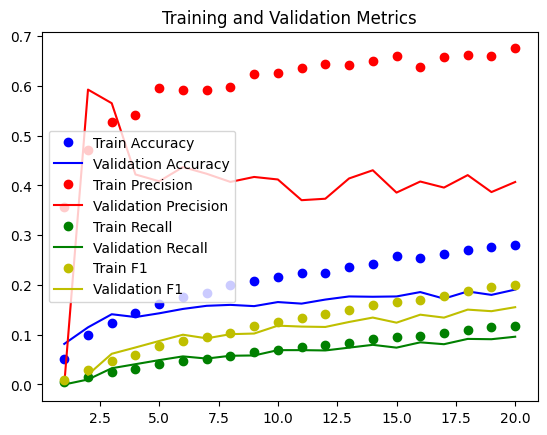

<Figure size 640x480 with 0 Axes>

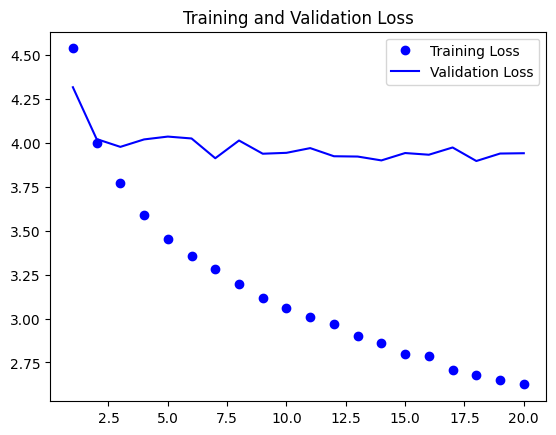

In [ ]:
import matplotlib.pyplot as plt
df_hist_vgg16 = pd.DataFrame.from_dict(history_vgg16.history)

df_hist_vgg16['f1'] = 2*(df_hist_vgg16['precision']*df_hist_vgg16['recall'])/(df_hist_vgg16['precision'] + df_hist_vgg16['recall'])
df_hist_vgg16['val_f1'] = 2*(df_hist_vgg16['val_precision']*df_hist_vgg16['val_recall'])/(df_hist_vgg16['val_precision']+df_hist_vgg16['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_vgg16) + 1)

plt.plot(epochs, df_hist_vgg16['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist_vgg16['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist_vgg16['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist_vgg16['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist_vgg16['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist_vgg16['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist_vgg16['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist_vgg16['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist_vgg16['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist_vgg16['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_vgg16.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 12s 133ms/step - loss: 3.8300 - AUROC: 0.8152 - accuracy: 0.1934 - precision: 0.3986 - recall: 0.0981
Test F1 Score 0.15748748448910022


In [ ]:
# fINE TUNING vgg16



base_model_vgg16.trainable=True


model_vgg16.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_fine_tune_vgg16 = model_vgg16.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

# Evaluating the model on the test set
#test_loss, test_acc = model.evaluate(ds_test)
#print(f"Test accuracy: {test_acc}, Test loss: {test_loss")

Epoch 1/20
206/206 [==============================] - 150s 636ms/step - loss: 2.4150 - AUROC: 0.9107 - accuracy: 0.3206 - precision: 0.7229 - recall: 0.1468 - val_loss: 4.1292 - val_AUROC: 0.7927 - val_accuracy: 0.1876 - val_precision: 0.3780 - val_recall: 0.1098
Epoch 2/20
206/206 [==============================] - 125s 608ms/step - loss: 2.2496 - AUROC: 0.9212 - accuracy: 0.3497 - precision: 0.7305 - recall: 0.1683 - val_loss: 4.0016 - val_AUROC: 0.8032 - val_accuracy: 0.2001 - val_precision: 0.4016 - val_recall: 0.1230
Epoch 3/20
206/206 [==============================] - 125s 606ms/step - loss: 2.1360 - AUROC: 0.9256 - accuracy: 0.3712 - precision: 0.7746 - recall: 0.1827 - val_loss: 3.6734 - val_AUROC: 0.8286 - val_accuracy: 0.2265 - val_precision: 0.4709 - val_recall: 0.1317
Epoch 4/20
206/206 [==============================] - 124s 601ms/step - loss: 2.0682 - AUROC: 0.9298 - accuracy: 0.3863 - precision: 0.7903 - recall: 0.1941 - val_loss: 3.6392 - val_AUROC: 0.8331 - val_accura

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_vgg16.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 7s 83ms/step - loss: 3.2646 - AUROC: 0.8600 - accuracy: 0.2933 - precision: 0.5631 - recall: 0.1872
Test F1 Score 0.2809706178688232


## VGG19

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import Accuracy, Precision, Recall
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Activation
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

from sklearn.metrics import f1_score

base_model_vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model_vgg19.trainable= False

x = base_model_vgg19.output

base_model_vgg19.trainable = False

# Applying GlobalAveragePooling2D to reduce feature dimensions
x = GlobalAveragePooling2D()(x)

# Batch Normalization before activation
x = BatchNormalization()(x)
# Dense layer
x = Dense(1024)(x)

# Batch Normalization before activation
x = BatchNormalization()(x)

x = Activation('relu')(x)
output = Dense(114, activation='softmax')(x)

model_vgg19 = Model(inputs=base_model_vgg19.input, outputs=output)

model_vgg19.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_vgg19 = model_vgg19.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict)

# Evaluating the model on the test set
#test_loss, test_acc = model.evaluate(ds_test)
#print(f"Test accuracy: {test_acc}, Test loss: {test_loss")


Epoch 1/20
206/206 [==============================] - 171s 554ms/step - loss: 4.5957 - AUROC: 0.6690 - accuracy: 0.0463 - precision: 0.2660 - recall: 0.0038 - val_loss: 4.3598 - val_AUROC: 0.7288 - val_accuracy: 0.0627 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 118s 572ms/step - loss: 4.1153 - AUROC: 0.7584 - accuracy: 0.0810 - precision: 0.4479 - recall: 0.0131 - val_loss: 4.1492 - val_AUROC: 0.7658 - val_accuracy: 0.0922 - val_precision: 0.5652 - val_recall: 0.0082
Epoch 3/20
206/206 [==============================] - 114s 553ms/step - loss: 3.9312 - AUROC: 0.7839 - accuracy: 0.1027 - precision: 0.4395 - recall: 0.0171 - val_loss: 4.1190 - val_AUROC: 0.7694 - val_accuracy: 0.1073 - val_precision: 0.4699 - val_recall: 0.0245
Epoch 4/20
206/206 [==============================] - 115s 557ms/step - loss: 3.7744 - AUROC: 0.8034 - accuracy: 0.1206 - precision: 0.5110 - recall: 0.0230 - val_loss: 4.1204 - val_AUROC: 0.7712 - va

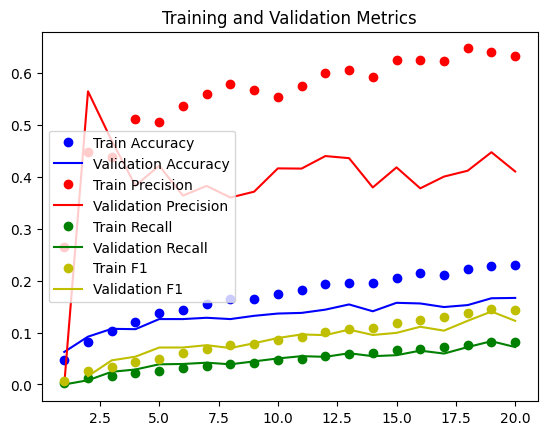

<Figure size 640x480 with 0 Axes>

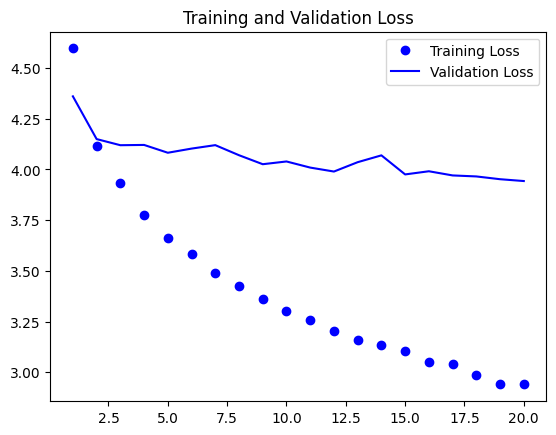

In [ ]:
import matplotlib.pyplot as plt
df_hist_vgg19 = pd.DataFrame.from_dict(history_vgg19.history)

df_hist_vgg19['f1'] = 2*(df_hist_vgg19['precision']*df_hist_vgg19['recall'])/(df_hist_vgg19['precision'] + df_hist_vgg19['recall'])
df_hist_vgg19['val_f1'] = 2*(df_hist_vgg19['val_precision']*df_hist_vgg19['val_recall'])/(df_hist_vgg19['val_precision']+df_hist_vgg19['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_vgg19) + 1)

plt.plot(epochs, df_hist_vgg19['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist_vgg19['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist_vgg19['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist_vgg19['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist_vgg19['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist_vgg19['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist_vgg19['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist_vgg19['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist_vgg19['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist_vgg19['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_vgg19.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 7s 83ms/step - loss: 4.0042 - AUROC: 0.7913 - accuracy: 0.1656 - precision: 0.4092 - recall: 0.0805
Test F1 Score 0.1345971521538957


In [ ]:
# fine tuning vgg19

base_model_vgg19.trainable=True


model_vgg19.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_fine_tune_vgg19 = model_vgg19.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

# Evaluating the model on the test set
#test_loss, test_acc = model.evaluate(ds_test)
#print(f"Test accuracy: {test_acc}, Test loss: {test_loss")

Epoch 1/20
206/206 [==============================] - 132s 618ms/step - loss: 2.7007 - AUROC: 0.8939 - accuracy: 0.2686 - precision: 0.7099 - recall: 0.1061 - val_loss: 4.0562 - val_AUROC: 0.7925 - val_accuracy: 0.1694 - val_precision: 0.3994 - val_recall: 0.0834
Epoch 2/20
206/206 [==============================] - 129s 625ms/step - loss: 2.5205 - AUROC: 0.9040 - accuracy: 0.3038 - precision: 0.7325 - recall: 0.1234 - val_loss: 3.8527 - val_AUROC: 0.8144 - val_accuracy: 0.1782 - val_precision: 0.4188 - val_recall: 0.1004
Epoch 3/20
206/206 [==============================] - 128s 619ms/step - loss: 2.4118 - AUROC: 0.9114 - accuracy: 0.3206 - precision: 0.7658 - recall: 0.1359 - val_loss: 3.6855 - val_AUROC: 0.8284 - val_accuracy: 0.2064 - val_precision: 0.4683 - val_recall: 0.1066
Epoch 4/20
206/206 [==============================] - 129s 625ms/step - loss: 2.3547 - AUROC: 0.9151 - accuracy: 0.3305 - precision: 0.7643 - recall: 0.1441 - val_loss: 3.5702 - val_AUROC: 0.8402 - val_accura

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_vgg19.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 8s 85ms/step - loss: 3.2876 - AUROC: 0.8579 - accuracy: 0.2859 - precision: 0.5464 - recall: 0.1537
Test F1 Score 0.23992916734082764


## GoogLeNet

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import metrics
from sklearn.utils import class_weight

# Load pre-trained GoogLeNet model
base_model_GLN = InceptionV3(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model_GLN.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Add Batch Normalization layer
output = Dense(114, activation='softmax')(x)

# Combine base model and custom layers
model_GLN = Model(inputs=base_model_GLN.input, outputs=output)

# Freeze layers in the base model
for layer in base_model_GLN.layers:
    layer.trainable = False

# Compile the model
model_GLN.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
               metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])

# Train the model
history_GLN = model_GLN.fit(
      train_augmented,
      epochs=20,
      validation_data=ds_validation,
      verbose=1,
      class_weight=class_weights_dict )




87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/20
206/206 [==============================] - 159s 677ms/step - loss: 4.6498 - AUROC: 0.6676 - accuracy: 0.0592 - precision: 0.1768 - recall: 0.0077 - val_loss: 4.4905 - val_AUROC: 0.7300 - val_accuracy: 0.0903 - val_precision: 0.1918 - val_recall: 0.0176
Epoch 2/20
206/206 [==============================] - 112s 543ms/step - loss: 4.0754 - AUROC: 0.7515 - accuracy: 0.1048 - precision: 0.3257 - recall: 0.0194 - val_loss: 4.3192 - val_AUROC: 0.7415 - val_accuracy: 0.1004 - val_precision: 0.3226 - val_recall: 0.0251
Epoch 3/20
206/206 [==============================] - 110s 533ms/step - loss: 3.8519 - AUROC: 0.7819 - accuracy: 0.1216 - precision: 0.3791 - recall: 0.0270 - val_loss: 4.1535 - val_AUROC: 0.7651 - val_accuracy: 0.1154 - val_precision: 0.3273 - val_recall: 0.0226
Epoch 4/20
206/206 [==============================] - 110s 534ms/step - loss: 3.7634 - AUROC: 0.7968 - accuracy: 0.1360 - precision: 0.4374 - r

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_GLN.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 9s 97ms/step - loss: 3.9759 - AUROC: 0.7952 - accuracy: 0.1486 - precision: 0.3923 - recall: 0.0465
Test F1 Score 0.08316430008283066


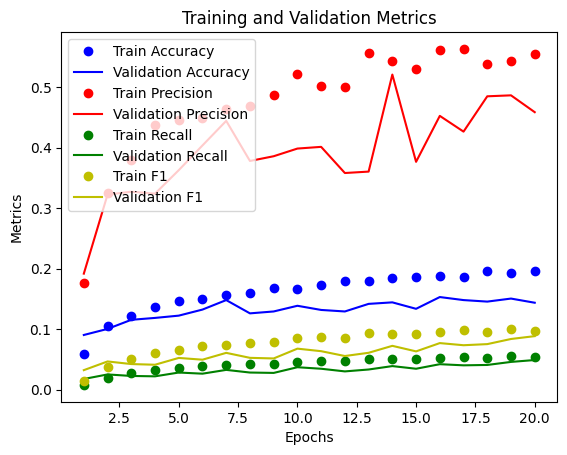

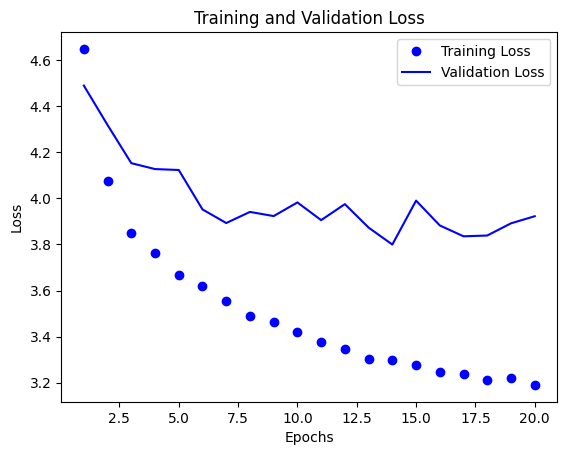

In [ ]:
# Convert history object to DataFrame
df_hist = pd.DataFrame.from_dict(history_GLN.history)

# Calculate F1 score
df_hist['f1'] = 2 * (df_hist['precision'] * df_hist['recall']) / (df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2 * (df_hist['val_precision'] * df_hist['val_recall']) / (df_hist['val_precision'] + df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

# Plot training and validation metrics
plt.plot(epochs, df_hist['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, df_hist['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# with opt=Adam

import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from sklearn.utils import class_weight


# Load pre-trained GoogLeNet model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Add Batch Normalization layer
output = Dense(114, activation='softmax')(x)

# Combine base model and custom layers
model_googlenet = Model(inputs=base_model.input, outputs=output)

# Freeze layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model_googlenet.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
               metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


# Train the model
history_googlenet = model_googlenet.fit(
    train_augmented,
    batch_size=32,
    epochs=20,
    validation_data=ds_validation,
    validation_steps=len(ds_validation) // 32,  # Adjust validation steps dynamically
    class_weight=class_weights_dict  # Pass the class weights dictionary to the class_weight parameter

)

Epoch 1/20
206/206 [==============================] - 120s 537ms/step - loss: 4.5631 - AUROC: 0.6817 - accuracy: 0.0648 - precision: 0.1947 - recall: 0.0077 - val_loss: 4.0459 - val_AUROC: 0.8184 - val_accuracy: 0.1250 - val_precision: 0.2500 - val_recall: 0.0750
Epoch 2/20
206/206 [==============================] - 110s 533ms/step - loss: 3.9956 - AUROC: 0.7666 - accuracy: 0.1133 - precision: 0.3592 - recall: 0.0190 - val_loss: 3.9174 - val_AUROC: 0.7636 - val_accuracy: 0.1500 - val_precision: 1.0000 - val_recall: 0.0500
Epoch 3/20
206/206 [==============================] - 142s 686ms/step - loss: 3.8154 - AUROC: 0.7934 - accuracy: 0.1232 - precision: 0.3960 - recall: 0.0254 - val_loss: 4.0300 - val_AUROC: 0.7835 - val_accuracy: 0.1500 - val_precision: 1.0000 - val_recall: 0.0250
Epoch 4/20
206/206 [==============================] - 112s 544ms/step - loss: 3.7252 - AUROC: 0.8063 - accuracy: 0.1358 - precision: 0.4255 - recall: 0.0317 - val_loss: 4.2889 - val_AUROC: 0.7722 - val_accura

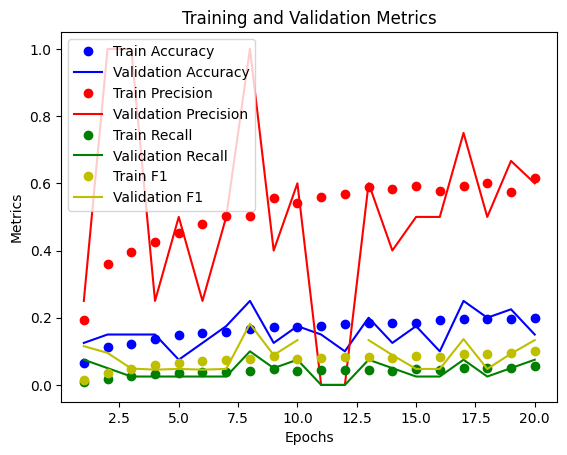

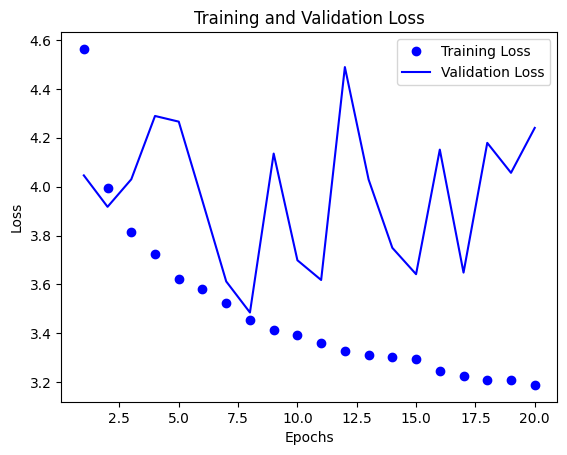

In [ ]:
# Convert history object to DataFrame
df_hist = pd.DataFrame.from_dict(history_googlenet.history)

# Calculate F1 score
df_hist['f1'] = 2 * (df_hist['precision'] * df_hist['recall']) / (df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2 * (df_hist['val_precision'] * df_hist['val_recall']) / (df_hist['val_precision'] + df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

# Plot training and validation metrics
plt.plot(epochs, df_hist['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, df_hist['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_googlenet.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 8s 93ms/step - loss: 3.9967 - AUROC: 0.7949 - accuracy: 0.1390 - precision: 0.4000 - recall: 0.0431
Test F1 Score 0.07782897883271792


## ZF Net

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.metrics import Accuracy, Precision, Recall
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import f1_score

# Define ZF Net architecture
def ZF_Net(input_shape=(224, 224, 3)):
    model = Sequential()
    # Convolutional layers
    model.add(Conv2D(96, (7, 7), strides=(2, 2), input_shape=input_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(256, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(Conv2D(384, (3, 3), activation='relu'))
    model.add(Conv2D(384, (3, 3), activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    # Flatten layer
    model.add(Flatten())
    # Fully connected layers
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(114, activation='softmax'))  # Adjust output size according to your task
    return model

# Create ZF Net model
base_model = ZF_Net()

# Compile the model
base_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                   loss='categorical_crossentropy',
                   metrics=[metrics.AUC(name='AUROC'),
                            metrics.CategoricalAccuracy(name='accuracy'),
                            metrics.Precision(name='precision'),
                            metrics.Recall(name='recall')])

# Train the model
history = base_model.fit(train_augmented,
                         epochs=20,
                         validation_data=ds_validation,
                         verbose=1,
                         class_weight=class_weights_dict)

# Evaluating the model on the test set
# test_loss, test_acc = base_model.evaluate(ds_test)
# print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


Epoch 1/20
206/206 [==============================] - 263s 1s/step - loss: 4.7378 - AUROC: 0.5000 - accuracy: 0.0105 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.7356 - val_AUROC: 0.5000 - val_accuracy: 0.0151 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 247s 1s/step - loss: 4.7369 - AUROC: 0.5000 - accuracy: 0.0091 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.7353 - val_AUROC: 0.5000 - val_accuracy: 0.0050 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
206/206 [==============================] - 249s 1s/step - loss: 4.7367 - AUROC: 0.5000 - accuracy: 0.0091 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.7352 - val_AUROC: 0.5000 - val_accuracy: 0.0100 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
 95/206 [============>.................] - ETA: 2:08 - loss: 4.7449 - AUROC: 0.5000 - accuracy: 0.0087 - precision: 0.0000e+00 - recall: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already defined and trained your ZF Net model and stored the history in 'history'

# Convert history to DataFrame
df_hist = pd.DataFrame.from_dict(history.history)

# Calculate F1 score
df_hist['f1'] = 2 * (df_hist['precision'] * df_hist['recall']) / (df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2 * (df_hist['val_precision'] * df_hist['val_recall']) / (
            df_hist['val_precision'] + df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

# Plotting each metric with specific line styles
plt.figure(figsize=(10, 6))

# Training metrics in solid lines
plt.plot(epochs, df_hist['loss'], 'b-', label='Train Loss')  # 'b-' for blue solid line
plt.plot(epochs, df_hist['accuracy'], 'r-', label='Train Accuracy')  # 'r-' for red solid line
plt.plot(epochs, df_hist['f1'], 'g-', label='Train F1 Score')  # 'g-' for green solid line

# Validation metrics in dashed lines
plt.plot(epochs, df_hist['val_loss'], 'b--', label='Validation Loss')  # 'b--' for blue dashed line
plt.plot(epochs, df_hist['val_accuracy'], 'r--', label='Validation Accuracy')  # 'r--' for red dashed line
plt.plot(epochs, df_hist['val_f1'], 'g--', label='Validation F1 Score')  # 'g--' for green dashed line

plt.title('ZF Net Model Performance Over Epochs')
plt.xlabel('Epochs')
plt.legend()
plt.grid(True)
plt.show()


# Handcrafted model


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import metrics
from tensorflow.keras.metrics import Accuracy, Precision, Recall

# Define the CNN architecture
#Batch normalization is applied after each convolutional layer to normalize the activations and improve training stability
def create_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), input_shape=input_shape),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Flatten(),
        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Set the input shape and number of classes
input_shape = (128, 128, 3)
num_classes = 114

# Create the CNN model
model_handcraft = create_cnn(input_shape, num_classes)

# Compile the model
model_handcraft.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])

# Load and preprocess your dataset (not shown here)

# Train the model
model_handcraft.fit(train_augmented, epochs=20, batch_size=32, validation_data=ds_validation, class_weight=class_weights_dict)

# Predict test labels
#y_pred = model_handcraft.predict(test_images)
#y_pred_classes = np.argmax(y_pred, axis=1)

Epoch 1/20
206/206 [==============================] - 121s 545ms/step - loss: 4.7191 - AUROC: 0.5493 - accuracy: 0.0154 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.7747 - val_AUROC: 0.5285 - val_accuracy: 0.0125 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 108s 526ms/step - loss: 4.5330 - AUROC: 0.6355 - accuracy: 0.0278 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 6.5035 - val_AUROC: 0.5204 - val_accuracy: 0.0100 - val_precision: 0.0348 - val_recall: 0.0050
Epoch 3/20
206/206 [==============================] - 108s 525ms/step - loss: 4.4244 - AUROC: 0.6761 - accuracy: 0.0388 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.9502 - val_AUROC: 0.5806 - val_accuracy: 0.0132 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
206/206 [==============================] - 111s 541ms/step - loss: 4.3462 - AUROC: 0.7020 - accuracy: 0.0479 - precision: 0.0000e+00 - recall: 0.0000e+00 - v

In [ ]:
# Evaluate the model
test_loss, test_auc, test_acc, test_precision, test_recall = model_handcraft.evaluate(ds_test)
test_f1_hand =  2*(test_precision*test_recall)/(test_precision + test_recall)
print("Test F1 Score", test_f1_hand )

HANDCRAFTED DENSENET (isto n é handcrafted)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics

# Load the pre-trained DenseNet121 model without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the pre-trained layers
base_model.trainable = False

# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
output = Dense(114, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=[
                  metrics.AUC(name='AUROC'),
                  metrics.CategoricalAccuracy(name='accuracy'),
                  metrics.Precision(name='precision'),
                  metrics.Recall(name='recall')
              ])

# Train the model
history = model.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation,
                    verbose=1,
                    class_weight=class_weights_dict)

# Evaluate the model
test_loss, test_auc, test_acc, test_precision, test_recall = model.evaluate(ds_test)
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print("Test F1 Score:", test_f1)


Epoch 1/20
206/206 [==============================] - 163s 692ms/step - loss: 4.1887 - AUROC: 0.7393 - accuracy: 0.0912 - precision: 0.4407 - recall: 0.0130 - val_loss: 3.7964 - val_AUROC: 0.8238 - val_accuracy: 0.1430 - val_precision: 0.4545 - val_recall: 0.0220
Epoch 2/20
206/206 [==============================] - 133s 648ms/step - loss: 3.3617 - AUROC: 0.8456 - accuracy: 0.1791 - precision: 0.5679 - recall: 0.0467 - val_loss: 3.5274 - val_AUROC: 0.8478 - val_accuracy: 0.1901 - val_precision: 0.5455 - val_recall: 0.0602
Epoch 3/20
206/206 [==============================] - 137s 668ms/step - loss: 3.0145 - AUROC: 0.8738 - accuracy: 0.2315 - precision: 0.6335 - recall: 0.0750 - val_loss: 3.4357 - val_AUROC: 0.8532 - val_accuracy: 0.2051 - val_precision: 0.5187 - val_recall: 0.0872
Epoch 4/20
206/206 [==============================] - 131s 637ms/step - loss: 2.7709 - AUROC: 0.8906 - accuracy: 0.2682 - precision: 0.6429 - recall: 0.0981 - val_loss: 3.3616 - val_AUROC: 0.8593 - val_accura

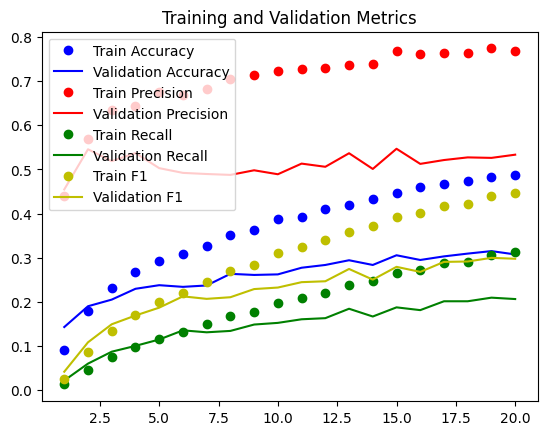

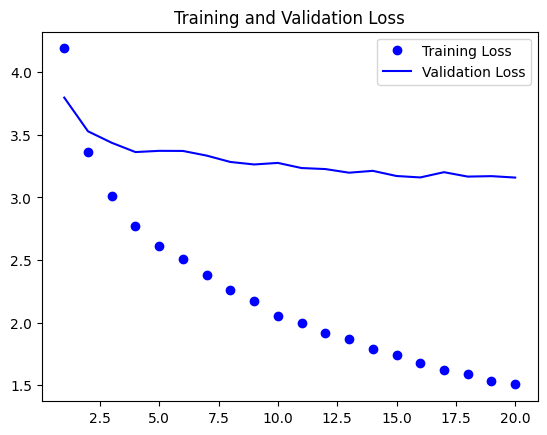

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Accessing the history object
df_hist = pd.DataFrame.from_dict(history.history)

# Calculate F1 score based on available metrics
df_hist['f1'] = 2*(df_hist['precision']*df_hist['recall'])/(df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2*(df_hist['val_precision']*df_hist['val_recall'])/(df_hist['val_precision']+df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

# Plot training and validation metrics
plt.plot(epochs, df_hist['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, df_hist['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


HANDCRAFTED VGG

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import metrics
from sklearn.utils import class_weight

# Define input shape
input_shape = (128, 128, 3)

# Define input layer
inputs = Input(shape=input_shape)

# Convolutional layers with 64 filters and 3x3 kernel size, followed by max pooling
x = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Convolutional layers with 128 filters and 3x3 kernel size, followed by max pooling
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Convolutional layers with 256 filters and 3x3 kernel size, followed by max pooling
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Convolutional layers with 512 filters and 3x3 kernel size, followed by max pooling
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Convolutional layers with 512 filters and 3x3 kernel size, followed by max pooling
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Flatten layer
x = Flatten()(x)

# Fully connected layers
x = Dense(4096, activation='relu')(x)
x = Dense(4096, activation='relu')(x)

# Output layer
outputs = Dense(114, activation='softmax')(x)

# Create the model
vgg_model = Model(inputs, outputs)

# Compile the model
vgg_model.compile(optimizer=Adam(lr=0.001),
                  loss='categorical_crossentropy',
                  metrics=[
                      metrics.AUC(name='AUROC'),
                      metrics.CategoricalAccuracy(name='accuracy'),
                      metrics.Precision(name='precision'),
                      metrics.Recall(name='recall')
                  ])

# Train the model
history_vgg = vgg_model.fit(
    train_augmented,
    batch_size=32,
    epochs=20,
    validation_data=ds_validation,
    validation_steps=len(ds_validation) // 32,  # Adjust validation steps dynamically
    class_weight=class_weights_dict  # Pass the class weights dictionary to the class_weight parameter
)



Epoch 1/20
206/206 [==============================] - 152s 613ms/step - loss: 4.7587 - AUROC: 0.4996 - accuracy: 0.0052 - precision: 0.0156 - recall: 7.5965e-05 - val_loss: 4.7332 - val_AUROC: 0.5000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 118s 570ms/step - loss: 4.7370 - AUROC: 0.5000 - accuracy: 0.0065 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.7351 - val_AUROC: 0.5000 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
206/206 [==============================] - 117s 565ms/step - loss: 4.7369 - AUROC: 0.5000 - accuracy: 0.0096 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.7332 - val_AUROC: 0.5000 - val_accuracy: 0.3750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
206/206 [==============================] - 117s 569ms/step - loss: 4.7369 - AUROC: 0.5000 - accuracy: 0.0058 - precision: 0.0000e+00 - recall: 0.

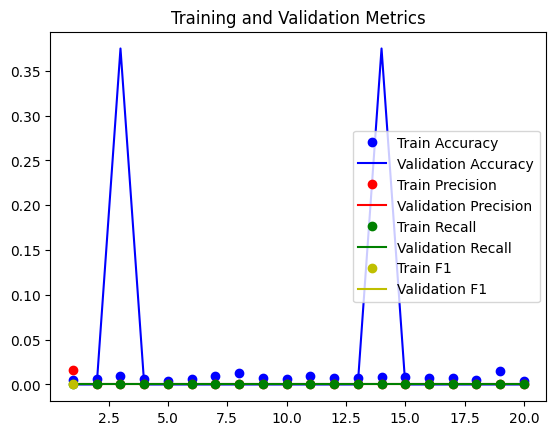

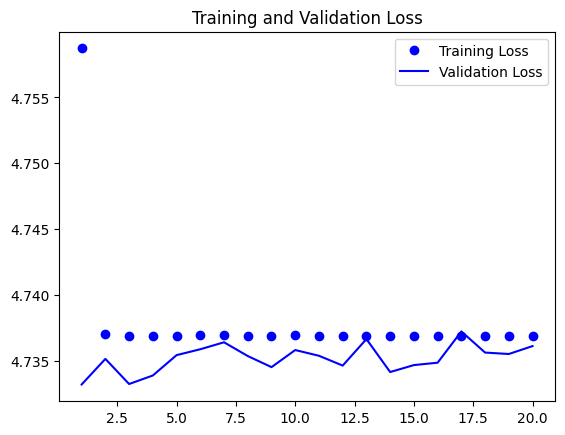

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the history object from the VGG model to a DataFrame
df_hist = pd.DataFrame.from_dict(history_vgg.history)

# Calculate F1 score
df_hist['f1'] = 2*(df_hist['precision']*df_hist['recall'])/(df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2*(df_hist['val_precision']*df_hist['val_recall'])/(df_hist['val_precision']+df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

# Plot training and validation metrics
plt.plot(epochs, df_hist['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, df_hist['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


HANDCRAFTED RESNET

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import metrics

def residual_block(inputs, filters, strides=(1, 1)):
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    shortcut = inputs
    if strides != (1, 1) or inputs.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same')(inputs)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def build_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)

    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)

    x = GlobalAveragePooling2D()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Define input shape and number of classes
input_shape = (128, 128, 3)  # Example input shape for an image
num_classes = 114  # Example number of output classes

# Build the model
model = build_resnet(input_shape, num_classes)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=[
                  metrics.AUC(name='AUROC'),
                  metrics.CategoricalAccuracy(name='accuracy'),
                  metrics.Precision(name='precision'),
                  metrics.Recall(name='recall')
              ])

# Train the model
history = model.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation,
                    verbose=1,
                    class_weight=class_weights_dict)

# Evaluate the model
test_loss, test_auc, test_acc, test_precision, test_recall = model.evaluate(ds_test)
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print("Test F1 Score:", test_f1)


Epoch 1/20
206/206 [==============================] - 131s 552ms/step - loss: 4.7001 - AUROC: 0.5909 - accuracy: 0.0165 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.8137 - val_AUROC: 0.5615 - val_accuracy: 0.0144 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 110s 532ms/step - loss: 4.5042 - AUROC: 0.6668 - accuracy: 0.0302 - precision: 1.0000 - recall: 7.5965e-05 - val_loss: 4.8292 - val_AUROC: 0.5744 - val_accuracy: 0.0094 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
206/206 [==============================] - 110s 532ms/step - loss: 4.3884 - AUROC: 0.7003 - accuracy: 0.0454 - precision: 0.5652 - recall: 9.8754e-04 - val_loss: 5.0522 - val_AUROC: 0.5882 - val_accuracy: 0.0107 - val_precision: 0.0893 - val_recall: 0.0031
Epoch 4/20
206/206 [==============================] - 108s 527ms/step - loss: 4.3047 - AUROC: 0.7213 - accuracy: 0.0541 - precision: 0.6190 - recall: 9.8754e-04 - val_loss: 4.6

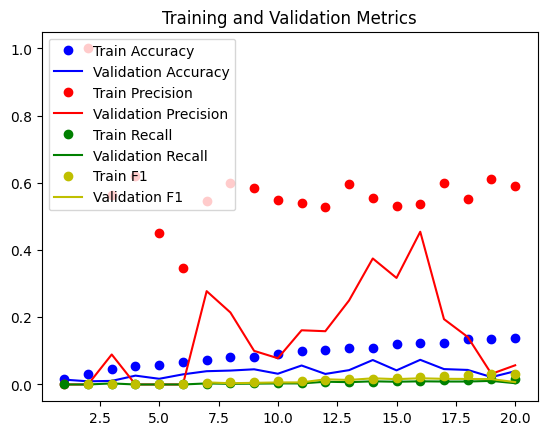

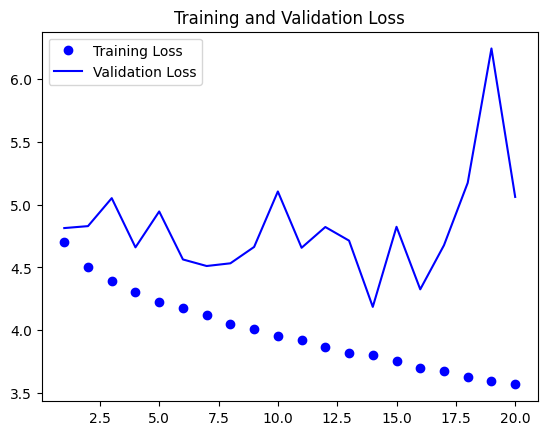

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the history object from the ResNet model to a DataFrame
df_hist = pd.DataFrame.from_dict(history.history)

# Calculate F1 score
df_hist['f1'] = 2*(df_hist['precision']*df_hist['recall'])/(df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2*(df_hist['val_precision']*df_hist['val_recall'])/(df_hist['val_precision']+df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

# Plot training and validation metrics
plt.plot(epochs, df_hist['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, df_hist['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


PURE HANDCRAFTED :

an example of a pure handcrafted convolutional neural network (CNN) model using TensorFlow/Keras:

In [ ]:
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten
from keras.models import Model
from keras.optimizers import SGD
from keras import metrics


# Define input shape
input_shape = (128, 128, 3)  # Example input shape for an image

# Define input layer
inputs = Input(shape=input_shape)

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten layer
x = Flatten()(x)

# Dense layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)

# Output layer
outputs = Dense(114, activation='softmax')(x)

# Create the model
handcrafted_model = Model(inputs, outputs)

# Compile the model
handcrafted_model.compile(optimizer=SGD(lr=0.01),
                          loss='categorical_crossentropy',
                          metrics=[
                              metrics.AUC(name='AUROC'),
                              metrics.CategoricalAccuracy(name='accuracy'),
                              metrics.Precision(name='precision'),
                              metrics.Recall(name='recall')
                          ])
# Train the model
history_handcrafted = handcrafted_model.fit(
    train_augmented,
    epochs=20,
    validation_data=ds_validation,
    class_weight=class_weights_dict  # Pass the class weights dictionary to the class_weight parameter
)


Epoch 1/20
206/206 [==============================] - 117s 527ms/step - loss: 4.7741 - AUROC: 0.5355 - accuracy: 0.0131 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 5.0267 - val_AUROC: 0.5120 - val_accuracy: 0.0138 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
206/206 [==============================] - 115s 559ms/step - loss: 4.6858 - AUROC: 0.5626 - accuracy: 0.0196 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.7903 - val_AUROC: 0.5349 - val_accuracy: 0.0132 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
206/206 [==============================] - 107s 521ms/step - loss: 4.6365 - AUROC: 0.5852 - accuracy: 0.0263 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.7004 - val_AUROC: 0.5733 - val_accuracy: 0.0251 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
206/206 [==============================] - 108s 526ms/step - loss: 4.5828 - AUROC: 0.6094 - accuracy: 0.0339 - precision: 0.2500 - recall: 1.5193e-04

In [ ]:
# Evaluate the model
test_loss, test_auc, test_acc, test_precision, test_recall = handcrafted_model.evaluate(ds_test)
test_f1 = 2 * (test_precision * test_recall) / (test_precision + test_recall)

print("Test F1 Score:", test_f1)


89/89 [==============================] - 8s 87ms/step - loss: 4.2456 - AUROC: 0.7509 - accuracy: 0.0953 - precision: 0.3067 - recall: 0.0130
Test F1 Score: 0.025027203243948696


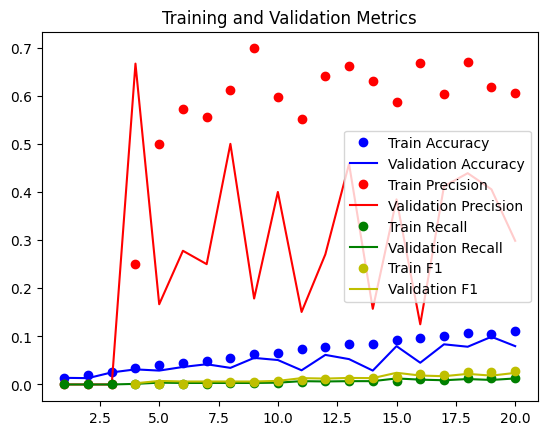

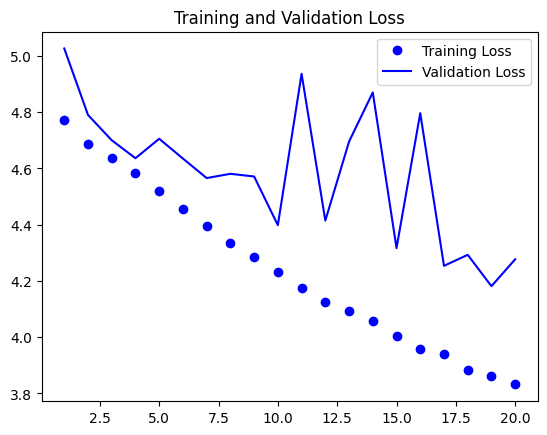

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

# Convert the history object from the handcrafted model to a DataFrame
df_hist = pd.DataFrame.from_dict(history_handcrafted.history)

# Calculate F1 score
df_hist['f1'] = 2*(df_hist['precision']*df_hist['recall'])/(df_hist['precision'] + df_hist['recall'])
df_hist['val_f1'] = 2*(df_hist['val_precision']*df_hist['val_recall'])/(df_hist['val_precision']+df_hist['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist) + 1)

# Plot training and validation metrics
plt.plot(epochs, df_hist['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(epochs, df_hist['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


# Hyperparameter Tuning

## RandomSearch: DenseNet201

In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from kerastuner.tuners import RandomSearch

def build_model(hp):
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    base_model.trainable = True

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    output = Dense(114, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Selecting optimizer based on choice
    optimizer_choice = hp.Choice('optimizer', ['sgd', 'adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=0.001, max_value=0.1, sampling='log')
    if optimizer_choice == 'sgd':
        momentum = hp.Float('momentum', min_value=0.5, max_value=0.9, step=0.1)
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    elif optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)


    print(f"Trial config: Optimizer={optimizer_choice}, Learning Rate={learning_rate}")

    if optimizer_choice == 'sgd':
        print(f"Momentum={momentum}")

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=[
            metrics.AUC(name='AUROC'),
            metrics.CategoricalAccuracy(name='accuracy'),
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall')
        ]
    )
    return model

# Setup the RandomSearch tuner


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='random_search',
    project_name='DenseNet201_hyperparam_tuning'
)

tuner.search(
    train_augmented,
    epochs=10,
    validation_data=ds_validation,
    class_weight=class_weights_dict,
    verbose=1
)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


Trial 10 Complete [00h 26m 37s]
val_accuracy: 0.04767879471182823

Best val_accuracy So Far: 0.3927226960659027
Total elapsed time: 04h 51m 32s
Trial config: Optimizer=sgd, Learning Rate=0.011629533934414977
Momentum=0.8


In [ ]:
tuner_results = tuner.results_summary()

print(tuner_results)

Results summary
Results in random_search/DenseNet201_hyperparam_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
optimizer: sgd
learning_rate: 0.011629533934414977
momentum: 0.8
Score: 0.3927226960659027

Trial 00 summary
Hyperparameters:
optimizer: rmsprop
learning_rate: 0.001217170995230137
momentum: 0.5
Score: 0.07340025156736374

Trial 08 summary
Hyperparameters:
optimizer: sgd
learning_rate: 0.08387373454287722
momentum: 0.9
Score: 0.050188206136226654

Trial 09 summary
Hyperparameters:
optimizer: rmsprop
learning_rate: 0.003306505106446718
momentum: 0.9
Score: 0.04767879471182823

Trial 04 summary
Hyperparameters:
optimizer: rmsprop
learning_rate: 0.008691502779666306
momentum: 0.6
Score: 0.03952321037650108

Trial 03 summary
Hyperparameters:
optimizer: rmsprop
learning_rate: 0.020843011585253736
momentum: 0.8
Score: 0.030740275979042053

Trial 02 summary
Hyperparameters:
optimizer: adam
learning_rate: 0.018807919043

Testing with the best parameters

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics


base_model_DenseNet201 = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Start adding layers from base_model's output
x = base_model_DenseNet201.output

base_model_DenseNet201.trainable = True

# Applying GlobalAveragePooling2D to reduce feature dimensions
x = GlobalAveragePooling2D()(x)

# Batch Normalization before activation
x = BatchNormalization()(x)
# Dense layer
x = Dense(1024)(x)  # Do not apply activation here yet

# Batch Normalization before activation
x = BatchNormalization()(x)

x = Activation('relu')(x)
output = Dense(114, activation='softmax')(x)

model_DenseNet201 = Model(inputs=base_model_DenseNet201.input, outputs=output)

model_DenseNet201.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.011629533934414977,momentum=0.8),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_DN = model_DenseNet201.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict )

Epoch 1/20
206/206 [==============================] - 205s 674ms/step - loss: 4.3236 - AUROC: 0.7163 - accuracy: 0.0750 - precision: 0.3747 - recall: 0.0124 - val_loss: 4.8210 - val_AUROC: 0.7110 - val_accuracy: 0.0690 - val_precision: 0.1354 - val_recall: 0.0276
Epoch 2/20
206/206 [==============================] - 138s 668ms/step - loss: 3.2828 - AUROC: 0.8579 - accuracy: 0.1976 - precision: 0.5297 - recall: 0.0609 - val_loss: 3.5265 - val_AUROC: 0.8480 - val_accuracy: 0.1901 - val_precision: 0.5072 - val_recall: 0.0665
Epoch 3/20
206/206 [==============================] - 138s 668ms/step - loss: 2.6636 - AUROC: 0.9043 - accuracy: 0.2924 - precision: 0.6355 - recall: 0.1212 - val_loss: 3.7164 - val_AUROC: 0.8191 - val_accuracy: 0.1738 - val_precision: 0.4068 - val_recall: 0.0822
Epoch 4/20
206/206 [==============================] - 141s 686ms/step - loss: 2.1914 - AUROC: 0.9303 - accuracy: 0.3753 - precision: 0.7145 - recall: 0.1899 - val_loss: 3.0828 - val_AUROC: 0.8812 - val_accura

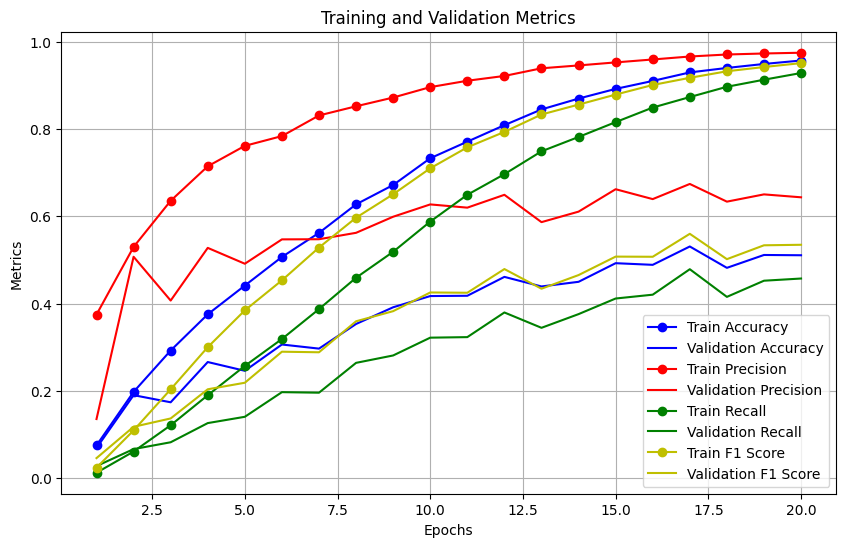

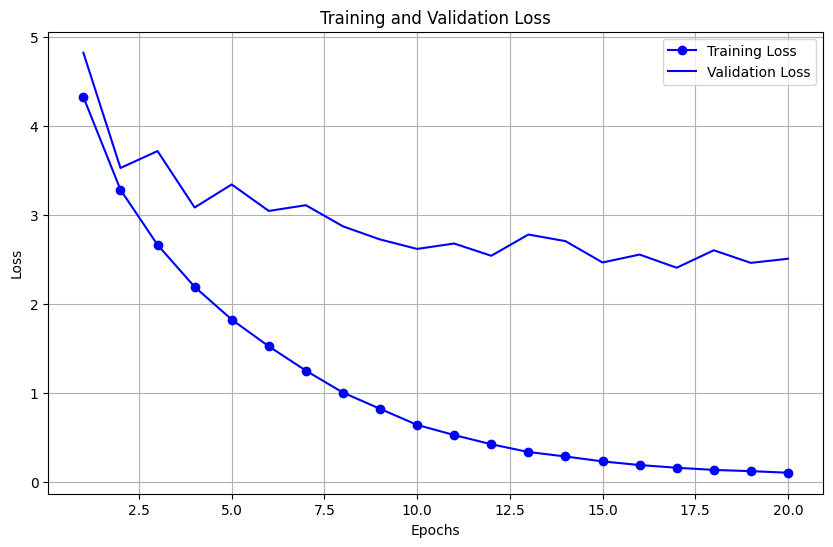

In [ ]:
# Assuming history is an object with a history attribute
df_hist_DN201 = pd.DataFrame.from_dict(history_DN.history)

# Calculate F1 score for training and validation sets
df_hist_DN201['f1'] = 2 * (df_hist_DN201['precision'] * df_hist_DN201['recall']) / (df_hist_DN201['precision'] + df_hist_DN201['recall'])
df_hist_DN201['val_f1'] = 2 * (df_hist_DN201['val_precision'] * df_hist_DN201['val_recall']) / (df_hist_DN201['val_precision'] + df_hist_DN201['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_DN201) + 1)

# Plot Training and Validation Metrics
plt.figure(figsize=(10, 6))
plt.plot(epochs, df_hist_DN201['accuracy'], 'bo-', label='Train Accuracy')
plt.plot(epochs, df_hist_DN201['val_accuracy'], 'b-', label='Validation Accuracy')
plt.plot(epochs, df_hist_DN201['precision'], 'ro-', label='Train Precision')
plt.plot(epochs, df_hist_DN201['val_precision'], 'r-', label='Validation Precision')
plt.plot(epochs, df_hist_DN201['recall'], 'go-', label='Train Recall')
plt.plot(epochs, df_hist_DN201['val_recall'], 'g-', label='Validation Recall')
plt.plot(epochs, df_hist_DN201['f1'], 'yo-', label='Train F1 Score')
plt.plot(epochs, df_hist_DN201['val_f1'], 'y-', label='Validation F1 Score')
plt.title("Training and Validation Metrics")
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, df_hist_DN201['loss'], 'bo-', label='Training Loss')
plt.plot(epochs, df_hist_DN201['val_loss'], 'b-', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_DenseNet201.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)

print("Test F1 Score", test_f1 )

89/89 [==============================] - 13s 148ms/step - loss: 2.5406 - AUROC: 0.8934 - accuracy: 0.5054 - precision: 0.6500 - recall: 0.4583
Test F1 Score 0.537591485565052


In [ ]:
model_DenseNet201.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 134, 134, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 64, 64, 64)           9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 64, 64, 64)           256       ['conv1/conv[0][0]']    

## RandomSearch: Resnet 152v2


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet152V2  # Make sure to use the model you're importing
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from keras_tuner import RandomSearch  # Updated to use 'keras_tuner' which is the newer name

def build_model(hp):
    base_model_resnet152v2 = ResNet152V2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    base_model_resnet152v2.trainable = True

    x = base_model_resnet152v2.output  # Correct variable name
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    output = Dense(114, activation='softmax')(x)

    model_resnet152v2 = Model(inputs=base_model_resnet152v2.input, outputs=output)  # Use correct name

    # Selecting optimizer based on choice
    optimizer_choice = hp.Choice('optimizer', ['sgd', 'adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=0.001, max_value=0.1, sampling='log')
    if optimizer_choice == 'sgd':
        momentum = hp.Float('momentum', min_value=0.5, max_value=0.9, step=0.1)
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    elif optimizer_choice == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

    print(f"Trial config: Optimizer={optimizer_choice}, Learning Rate={learning_rate}")
    if optimizer_choice == 'sgd':
        print(f"Momentum={momentum}")

    model_resnet152v2.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=[
            metrics.AUC(name='AUROC'),
            metrics.CategoricalAccuracy(name='accuracy'),
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall')
        ]
    )
    return model_resnet152v2


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='random_search',
    project_name='ResNet152V2_hyperparam_tuning'  # Changed project name to match the model used
)

# Perform the search
tuner.search(
    train_augmented,  # Make sure this dataset is prepared for training
    epochs=10,
    validation_data=ds_validation,  # Validation dataset
    class_weight=class_weights_dict,  # Class weights, if applicable
    verbose=1
)

# Retrieve the best model
best_model_RN = tuner.get_best_models(num_models=1)[0]



Trial 10 Complete [00h 33m 43s]
val_accuracy: 0.01693851873278618

Best val_accuracy So Far: 0.2961104214191437
Total elapsed time: 05h 19m 55s
Trial config: Optimizer=sgd, Learning Rate=0.0026556388261003545
Momentum=0.6


In [ ]:
tuner_results_rn = tuner.results_summary()

print(tuner_results_rn)

Results summary
Results in random_search/ResNet152V2_hyperparam_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
optimizer: sgd
learning_rate: 0.0026556388261003545
momentum: 0.6
Score: 0.2961104214191437

Trial 06 summary
Hyperparameters:
optimizer: rmsprop
learning_rate: 0.014002116550133281
momentum: 0.8
Score: 0.03638644888997078

Trial 03 summary
Hyperparameters:
optimizer: rmsprop
learning_rate: 0.0031096248743627103
momentum: 0.6
Score: 0.02885821834206581

Trial 09 summary
Hyperparameters:
optimizer: rmsprop
learning_rate: 0.007238718281555081
momentum: 0.7
Score: 0.01693851873278618

Trial 00 summary
Hyperparameters:
optimizer: sgd
learning_rate: 0.0075170999829928895
momentum: 0.9
Score: 0.016311166808009148

Trial 01 summary
Hyperparameters:
optimizer: rmsprop
learning_rate: 0.007621631689572638
momentum: 0.9
Score: 0.015056462027132511

Trial 05 summary
Hyperparameters:
optimizer: adam
learning_rate: 0.06742985

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, BatchNormalization, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras import metrics

base_model_resnet152v2 = ResNet152V2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


base_model_resnet152v2.trainable = True

x = base_model_resnet152v2.output
x = GlobalAveragePooling2D()(x)

x = BatchNormalization()(x)
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
output = Dense(114, activation='softmax')(x)


model_resnet152v2 = Model(inputs=base_model_resnet152v2.input, outputs=output)

model_resnet152v2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0026556388261003545, momentum=0.6),
              loss='categorical_crossentropy',
              metrics=[metrics.AUC(name='AUROC'),
                       metrics.CategoricalAccuracy(name='accuracy'),
                       metrics.Precision(name='precision'),
                       metrics.Recall(name='recall')])


history_resnet152v2 = model_resnet152v2.fit(train_augmented,
                    epochs=20,
                    validation_data=ds_validation, verbose=1, class_weight=class_weights_dict)





234545216/234545216 [==============================] - 3s 0us/step
Epoch 1/20
206/206 [==============================] - 261s 765ms/step - loss: 4.8212 - AUROC: 0.5647 - accuracy: 0.0214 - precision: 0.1429 - recall: 7.5965e-05 - val_loss: 4.6905 - val_AUROC: 0.6414 - val_accuracy: 0.0332 - val_precision: 0.0800 - val_recall: 0.0013
Epoch 2/20
206/206 [==============================] - 148s 715ms/step - loss: 4.2424 - AUROC: 0.7063 - accuracy: 0.0748 - precision: 0.4653 - recall: 0.0036 - val_loss: 4.5509 - val_AUROC: 0.6792 - val_accuracy: 0.0640 - val_precision: 0.3846 - val_recall: 0.0157
Epoch 3/20
206/206 [==============================] - 169s 819ms/step - loss: 3.7812 - AUROC: 0.7848 - accuracy: 0.1349 - precision: 0.5964 - recall: 0.0176 - val_loss: 4.0103 - val_AUROC: 0.7738 - val_accuracy: 0.1374 - val_precision: 0.4348 - val_recall: 0.0376
Epoch 4/20
206/206 [==============================] - 147s 713ms/step - loss: 3.4295 - AUROC: 0.8292 - accuracy: 0.1764 - precision: 0.65

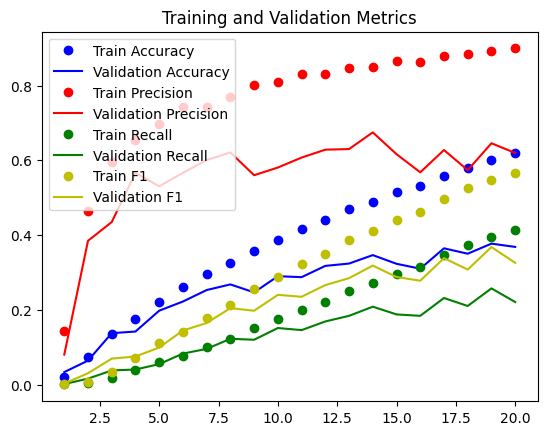

<Figure size 640x480 with 0 Axes>

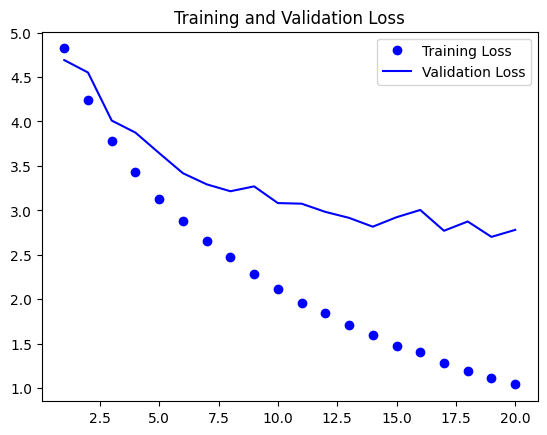

In [ ]:
import matplotlib.pyplot as plt
df_hist_resnet152v2 = pd.DataFrame.from_dict(history_resnet152v2.history)

df_hist_resnet152v2['f1'] = 2 * (df_hist_resnet152v2['precision'] * df_hist_resnet152v2['recall']) / (df_hist_resnet152v2['precision'] + df_hist_resnet152v2['recall'])
df_hist_resnet152v2['val_f1'] = 2*(df_hist_resnet152v2['val_precision']*df_hist_resnet152v2['val_recall'])/(df_hist_resnet152v2['val_precision']+df_hist_resnet152v2['val_recall'])

# Define the epochs as x-axis
epochs = range(1, len(df_hist_resnet152v2) + 1)

plt.plot(epochs, df_hist_resnet152v2['accuracy'], 'bo', label='Train Accuracy')
plt.plot(epochs, df_hist_resnet152v2['val_accuracy'], 'b', label='Validation Accuracy')
plt.plot(epochs, df_hist_resnet152v2['precision'], 'ro', label='Train Precision')
plt.plot(epochs, df_hist_resnet152v2['val_precision'], 'r', label='Validation Precision')
plt.plot(epochs, df_hist_resnet152v2['recall'], 'go', label='Train Recall')
plt.plot(epochs, df_hist_resnet152v2['val_recall'], 'g', label='Validation Recall')
plt.plot(epochs, df_hist_resnet152v2['f1'], 'yo', label='Train F1')
plt.plot(epochs, df_hist_resnet152v2['val_f1'], 'y', label='Validation F1')
plt.title("Training and Validation Metrics")
plt.legend()
plt.figure()
plt.show()

# Validation metrics in dashed lines
plt.plot(epochs, df_hist_resnet152v2['loss'], 'bo', label='Training Loss')
plt.plot(epochs, df_hist_resnet152v2['val_loss'], 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_auc, test_acc, test_precision, test_recall = model_resnet152v2.evaluate(ds_test)

test_f1 =  2*(test_precision*test_recall)/(test_precision + test_recall)


print("Test F1 Score", test_f1)

89/89 [==============================] - 10s 111ms/step - loss: 2.8056 - AUROC: 0.8898 - accuracy: 0.3625 - precision: 0.6491 - recall: 0.2445
Test F1 Score 0.35517099436782074


In [ ]:
model_resnet152v2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 134, 134, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 64, 64, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 66, 66, 64)           0         ['conv1_conv[0][0]']          
                                                                                              

## Random Search Handcrafted model


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, metrics
from keras_tuner import RandomSearch, HyperParameters

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(filters=hp.Int('conv1_filters', min_value=32, max_value=64, step=16),
                            kernel_size=(3, 3), strides=1, padding='same', activation='relu',
                            input_shape=(128, 128, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(layers.Conv2D(filters=hp.Int('conv2_filters', min_value=64, max_value=128, step=32),
                            kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(layers.Conv2D(filters=hp.Int('conv3_filters', min_value=128, max_value=256, step=64),
                            kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(layers.Conv2D(filters=hp.Int('conv4_filters', min_value=256, max_value=512, step=128),
                            kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(layers.Conv2D(filters=hp.Int('conv5_filters', min_value=512, max_value=1024, step=256),
                            kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(layers.Flatten())
    model.add(layers.Dense(units=hp.Int('dense_units', min_value=1024, max_value=2048, step=512),
                           activation='relu',
                           kernel_regularizer=regularizers.l2(hp.Float('dense_kernel_reg', min_value=0.0001, max_value=0.01, sampling='log'))))
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(layers.Dense(114, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=[
            metrics.AUC(name='AUROC'),
            metrics.CategoricalAccuracy(name='accuracy'),
            metrics.Precision(name='precision'),
            metrics.Recall(name='recall')
        ]
    )

    return model




tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='model_tuning',
    project_name='keras_tuner_run_handcrafted'
)

tuner.search(train_augmented, epochs=10, validation_data=ds_validation, verbose=1)

# Display search summary
tuner.results_summary()

# Get the best model and its hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_times=1)[0]

print("Best model summary:")
best_model.summary()
print("Best hyperparameters:", best_hyperparameters.values)


Trial 10 Complete [00h 20m 52s]
val_accuracy: 0.040777917951345444

Best val_accuracy So Far: 0.08908406645059586
Total elapsed time: 03h 19m 09s
Results summary
Results in model_tuning/keras_tuner_run_handcrafted
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 04 summary
Hyperparameters:
conv1_filters: 32
conv2_filters: 64
conv3_filters: 256
conv4_filters: 512
conv5_filters: 768
dense_units: 1536
dense_kernel_reg: 0.00017298491882468178
dropout_rate: 0.5
learning_rate: 0.00021740830827969153
Score: 0.08908406645059586

Trial 02 summary
Hyperparameters:
conv1_filters: 32
conv2_filters: 128
conv3_filters: 128
conv4_filters: 512
conv5_filters: 512
dense_units: 2048
dense_kernel_reg: 0.00018500183003673418
dropout_rate: 0.2
learning_rate: 0.0019277164387713425
Score: 0.049560852348804474

Trial 08 summary
Hyperparameters:
conv1_filters: 64
conv2_filters: 96
conv3_filters: 192
conv4_filters: 384
conv5_filters: 512
dense_units: 1536
dense_kernel_reg: 0.00892069

TypeError: BaseTuner.get_best_hyperparameters() got an unexpected keyword argument 'num_times'